In [8]:
#scikit-learn,pytest warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
#import libraries for data handling
import numpy as np 
import pandas as pd 

In [10]:
housing = pd.read_csv("train.csv")

In [11]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [14]:
na_col =["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [15]:
for feature in na_col:
    housing[feature]=housing[feature].fillna("None")

In [16]:
housing.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [17]:
housing.isnull().any().sum()

6

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


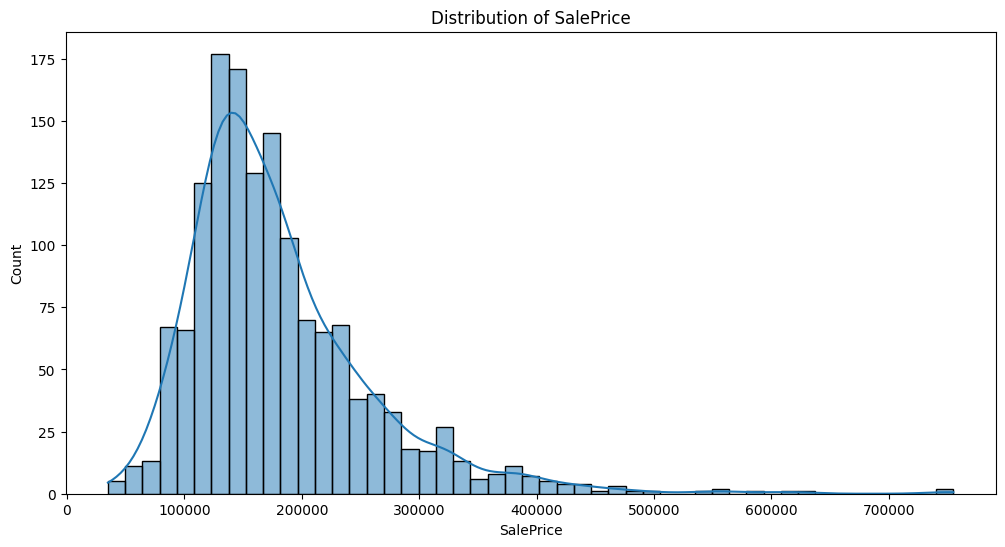

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(housing["SalePrice"], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


In [21]:
print(housing.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
housing['SalePrice'].skew()

1.8828757597682129

In [23]:
housing['SalePrice'].kurt()

6.536281860064529

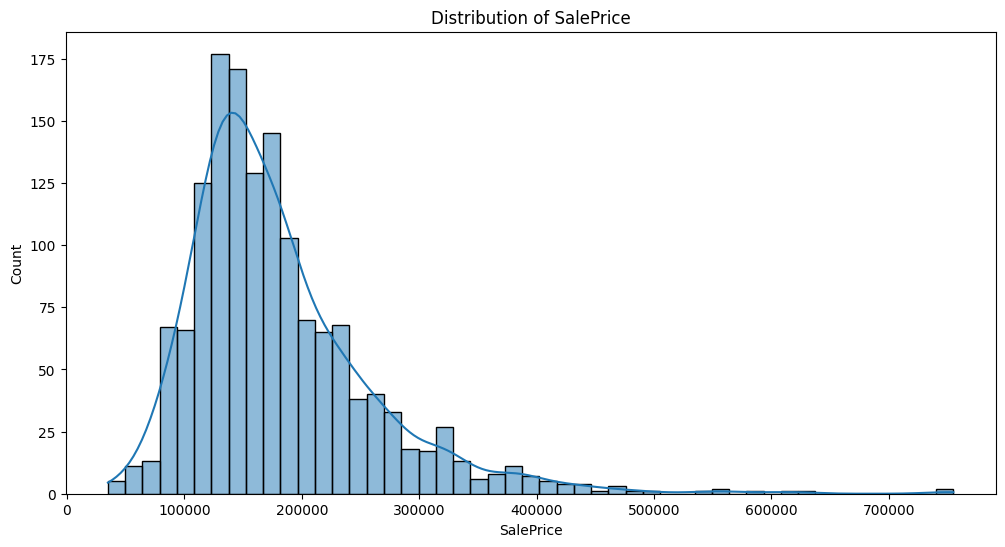

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(housing["SalePrice"], kde=True)
plt.title('Distribution of SalePrice')
plt.show()
# Calculating skewness and kurtosis
skewness = housing['SalePrice'].skew()
kurtosis = housing['SalePrice'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


In [25]:
housing.drop("Id",axis =1,inplace =True)

In [29]:
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = \
housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype(int)


In [30]:
housing['LotFrontage']=pd.to_numeric(housing['LotFrontage'],errors ='coerce')
housing['MasVnrArea']=pd.to_numeric(housing['MasVnrArea'],errors ='coerce')

In [31]:
housing.isnull().mean()*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [32]:
#imputing numerical cols with meadian/mean and cate cols with Mode
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'Electrical',
       'GarageYrBlt'],
      dtype='object')

In [33]:
for feature in null_cols:
    if housing[feature].dtype == np.float64 or housing[feature].dtype == np.int64:
        housing[feature].fillna(housing[feature].median(),inplace=True)
    else:
        housing[feature].fillna(housing[feature].mode()[0],inplace=True)

In [34]:
housing.isnull().any().sum()

0

In [35]:
cat_cols = housing.select_dtypes(include='object').columns
num_cols = housing.select_dtypes(include=['int64', 'float64']).columns

cat_cols, num_cols



(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'F

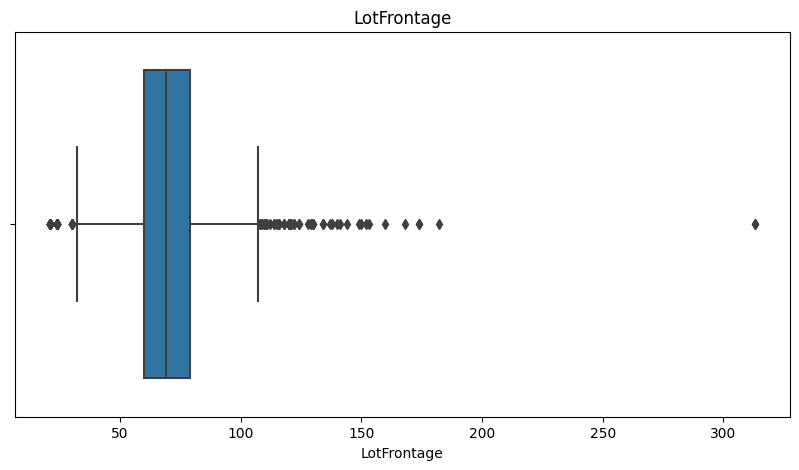

Skipping non-numeric column: MasVnrType


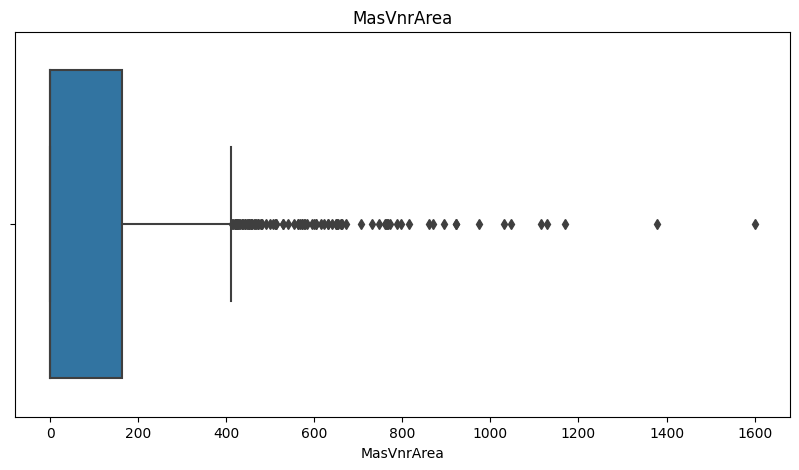

Skipping non-numeric column: BsmtFinType1
Skipping non-numeric column: Electrical


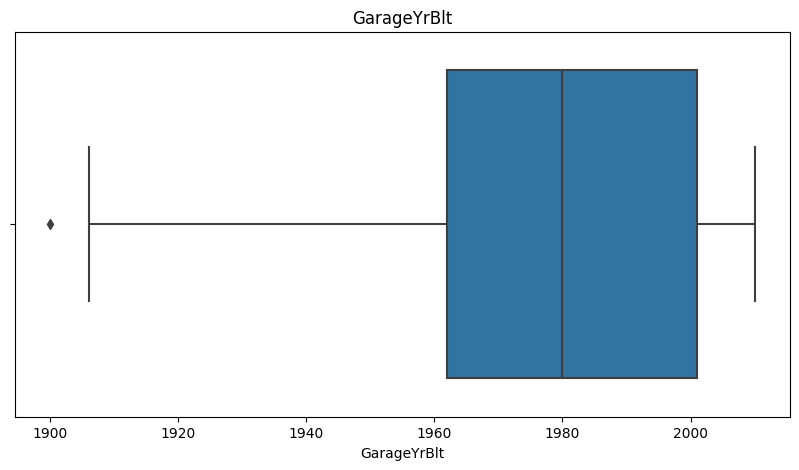

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in null_cols:
    if pd.api.types.is_numeric_dtype(housing[col]):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=housing[col])
        plt.title(col)
        plt.show()
    else:
        print(f"Skipping non-numeric column: {col}")


RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


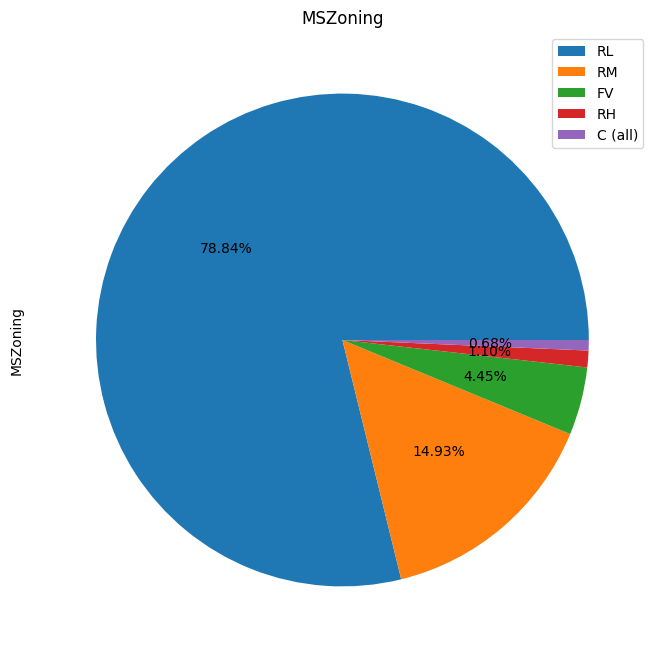

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


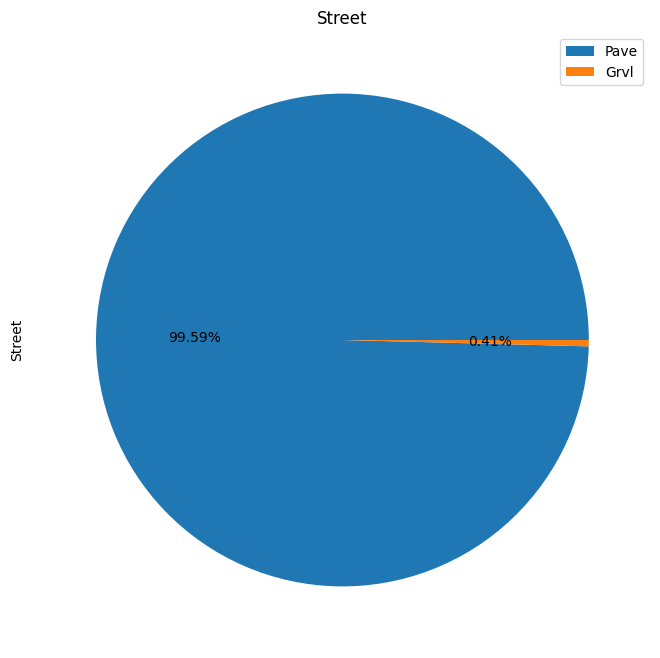

None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


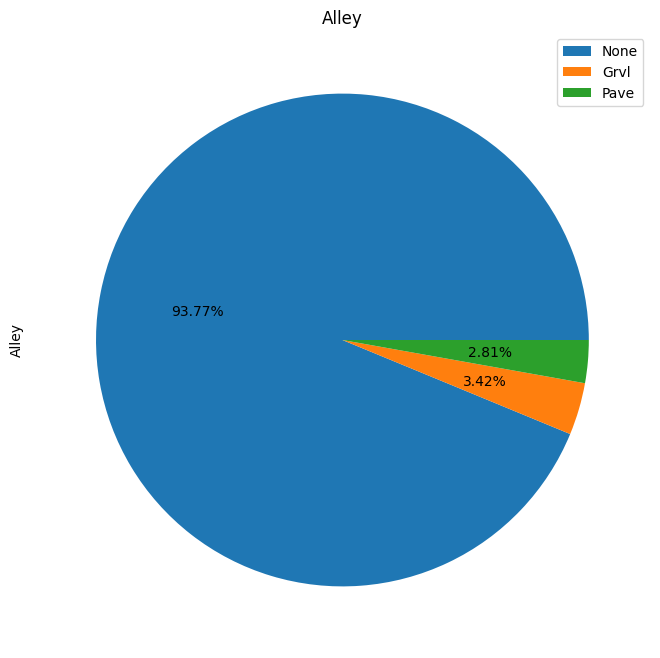

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


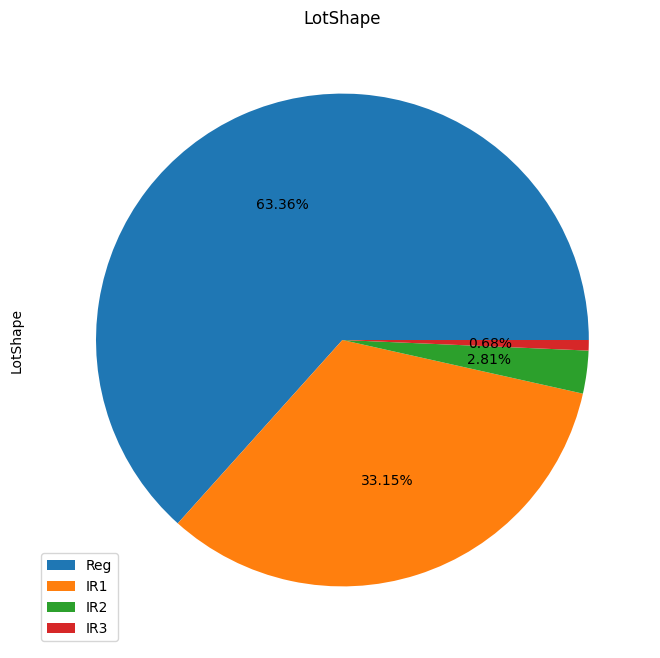

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


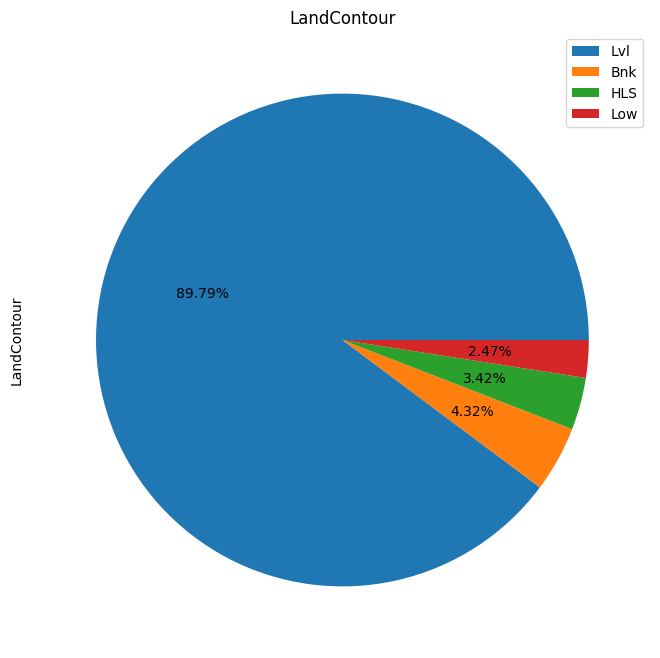

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


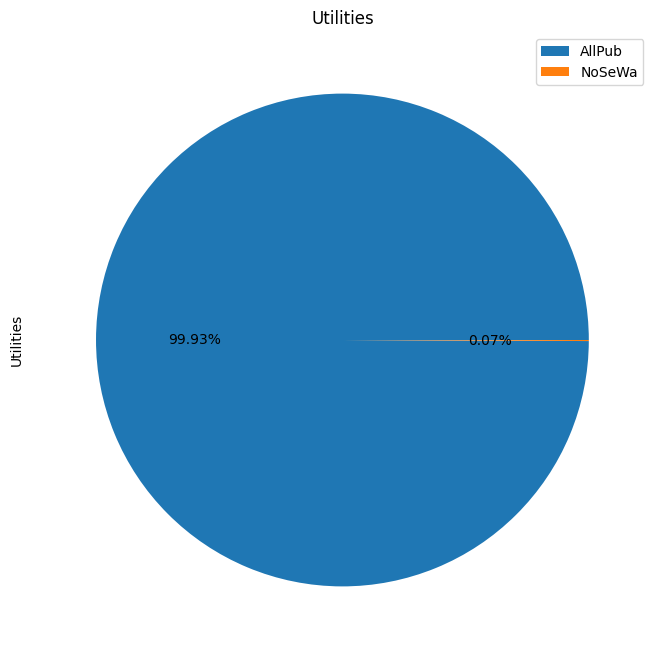

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


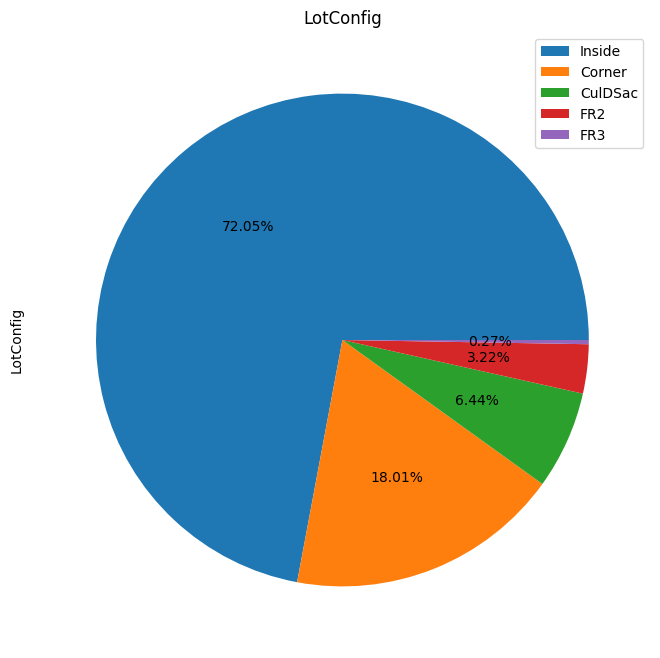

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


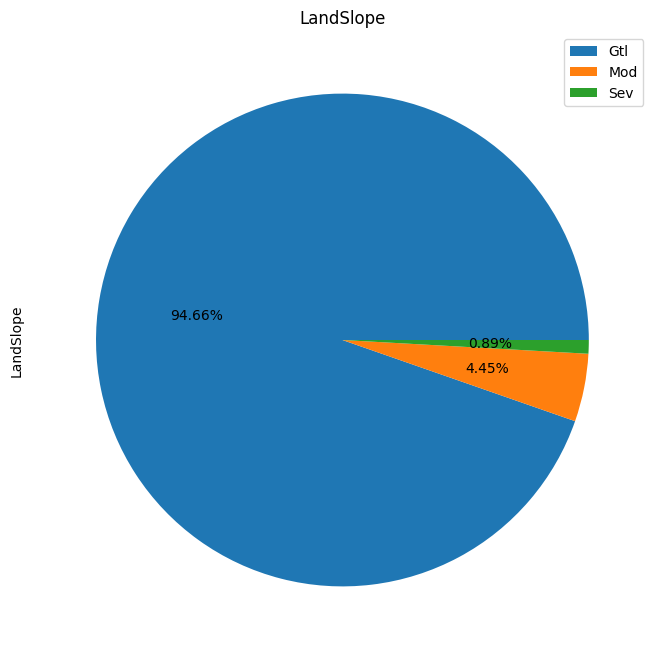

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64


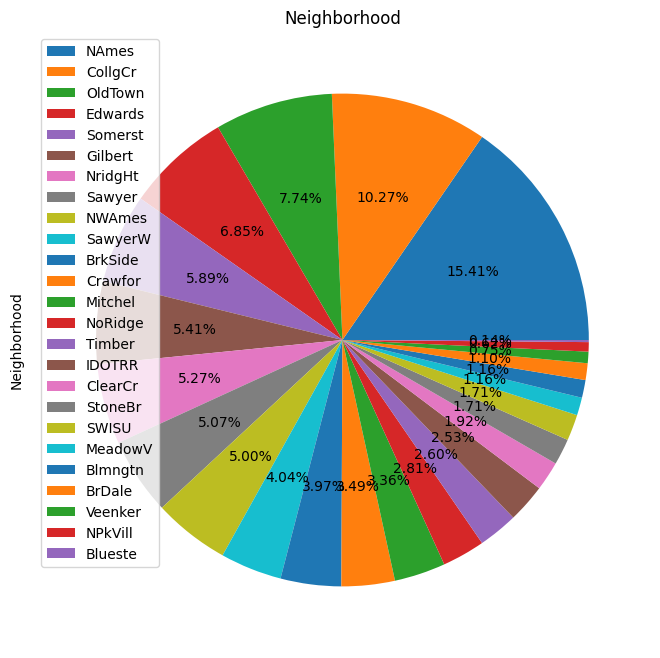

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64


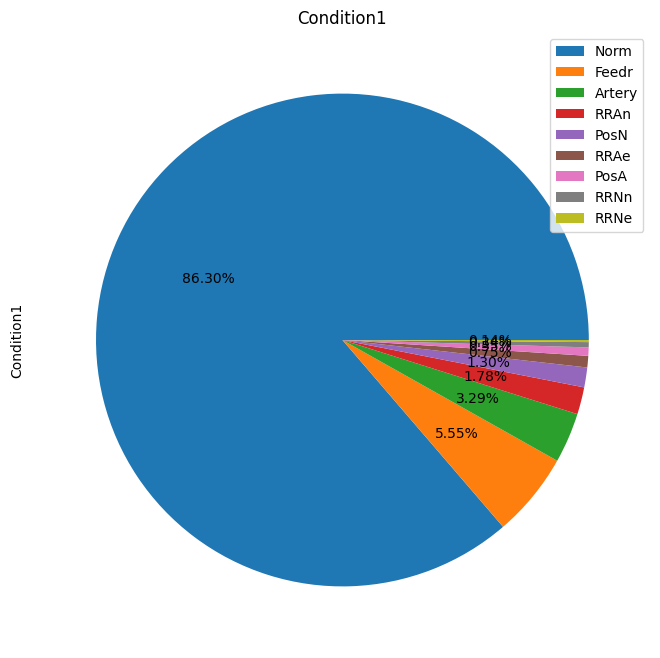

Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64


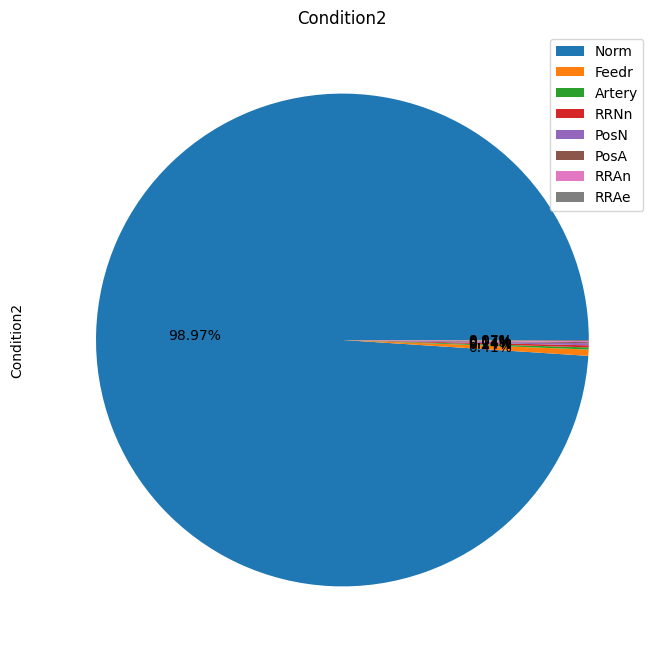

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


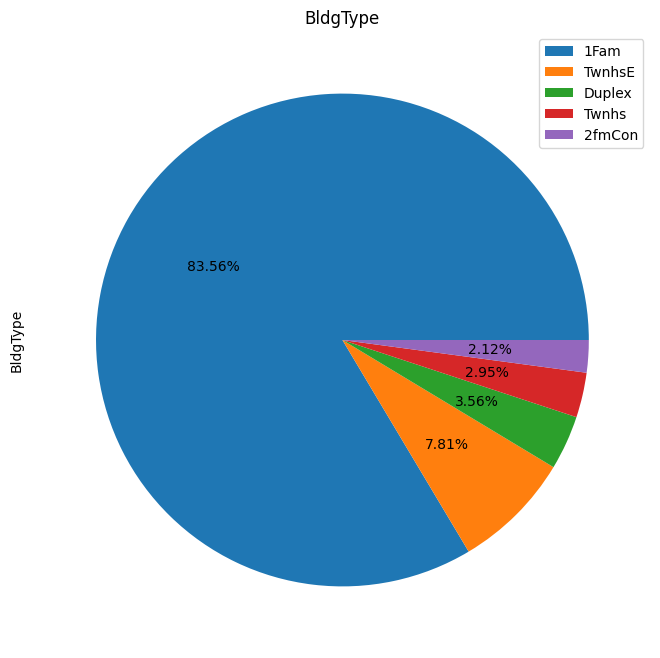

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


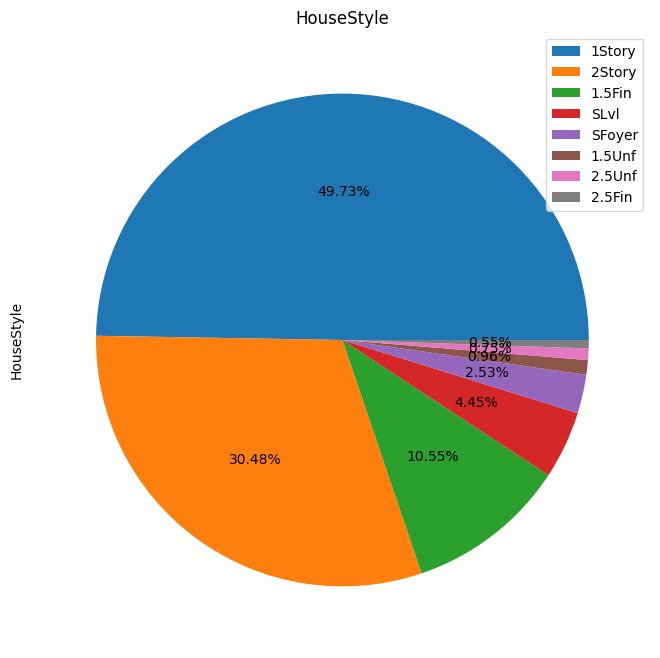

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64


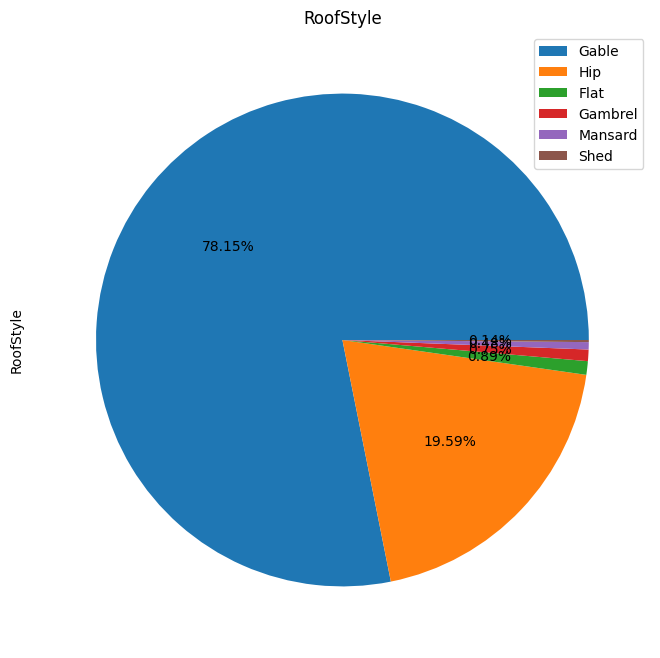

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64


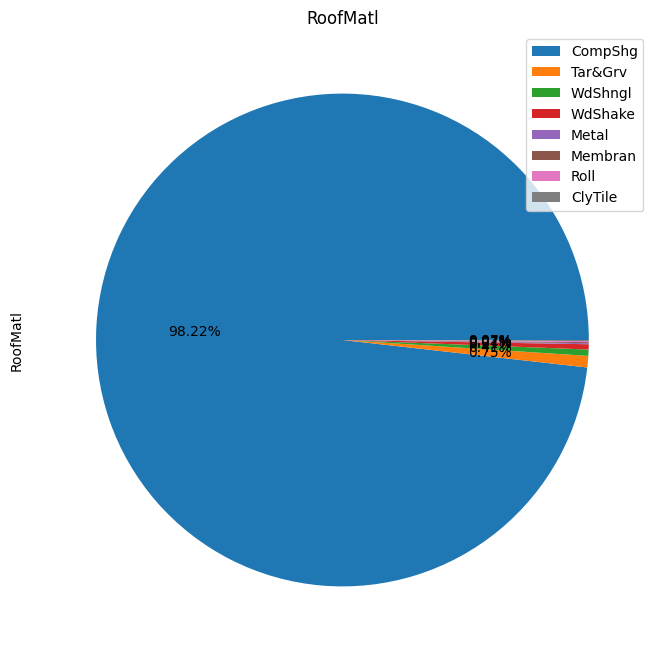

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64


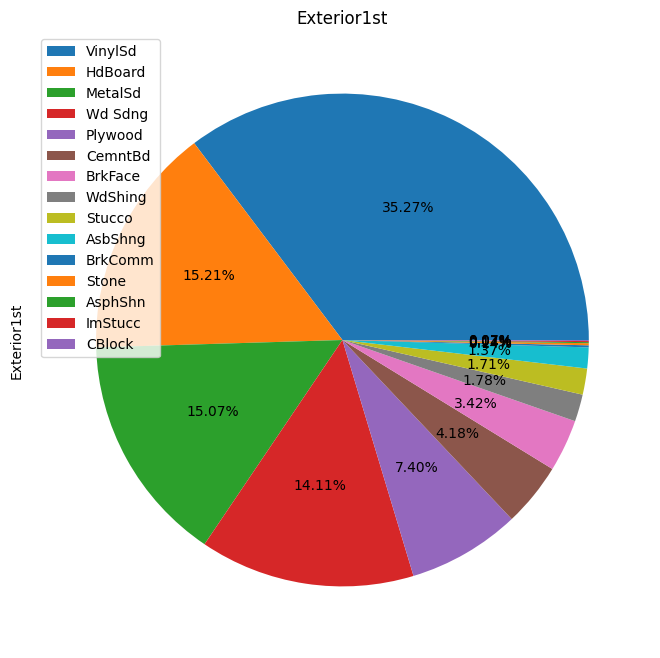

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64


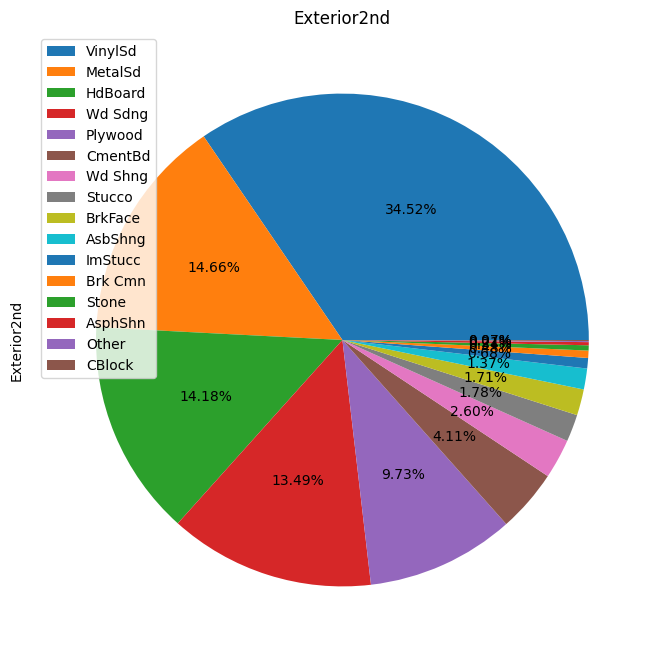

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64


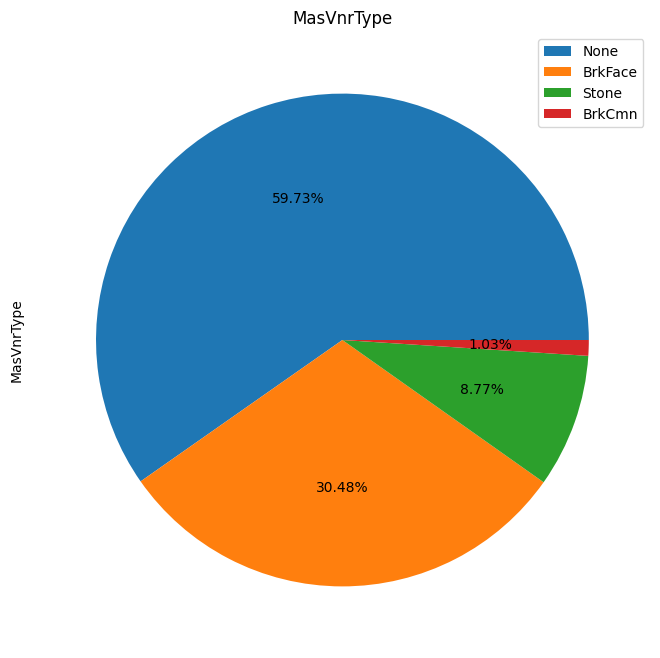

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64


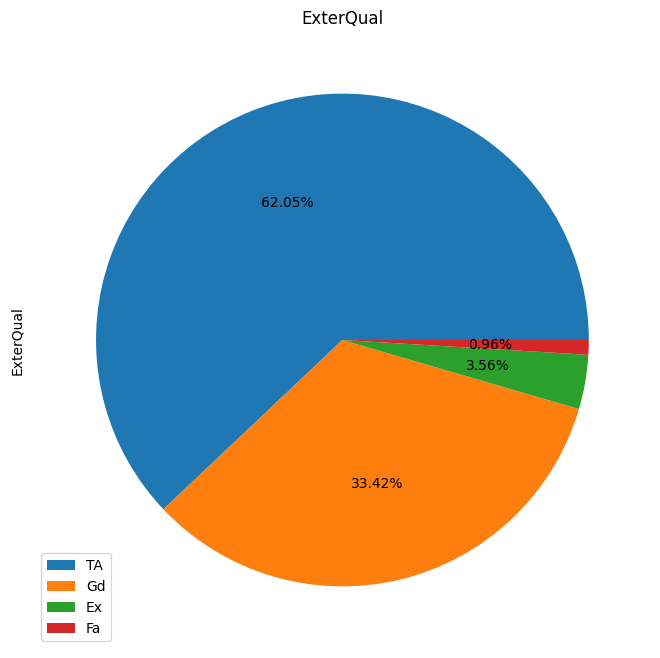

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64


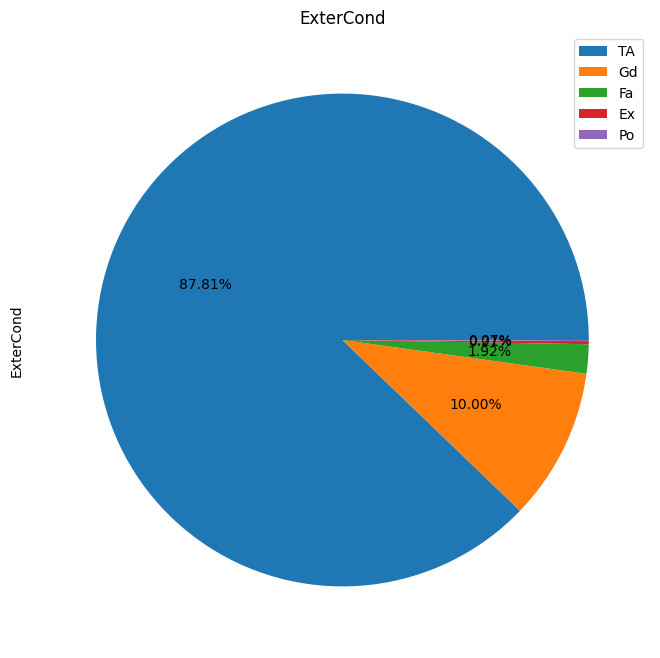

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64


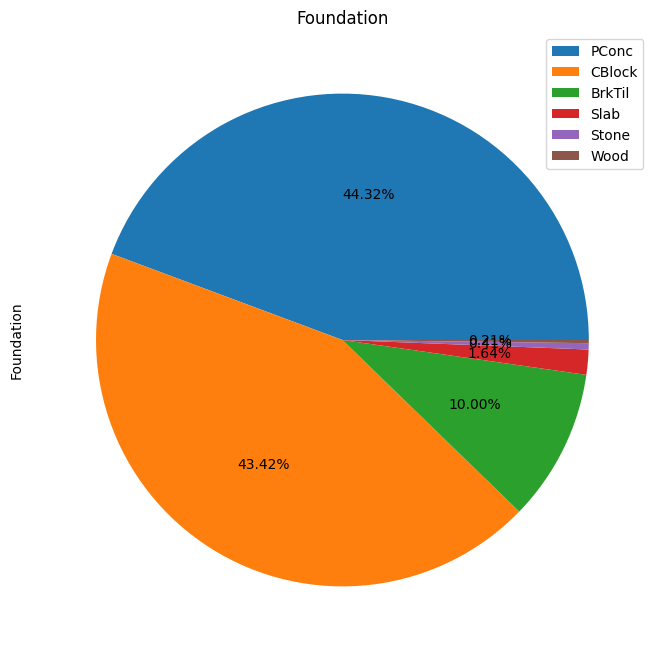

TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: BsmtQual, dtype: float64


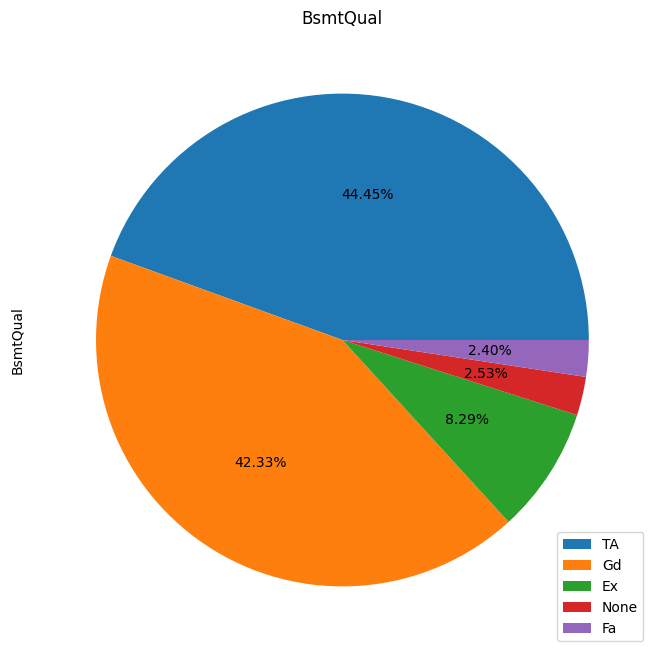

TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: BsmtCond, dtype: float64


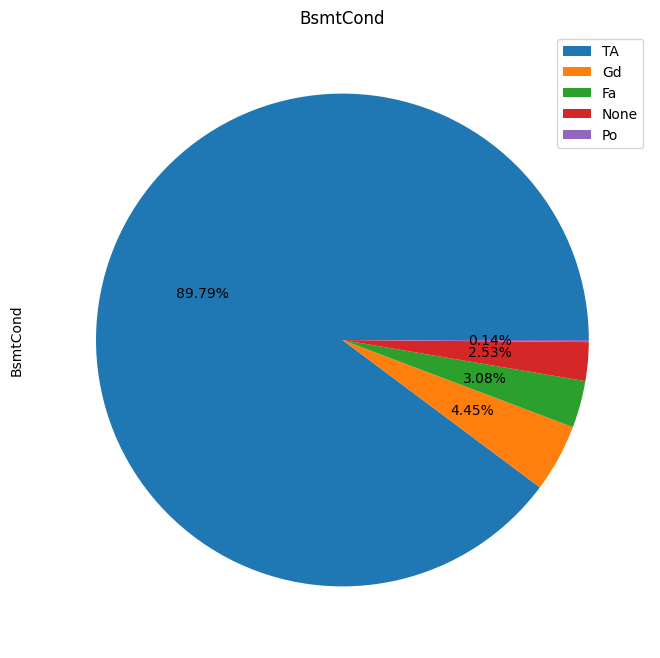

No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: BsmtExposure, dtype: float64


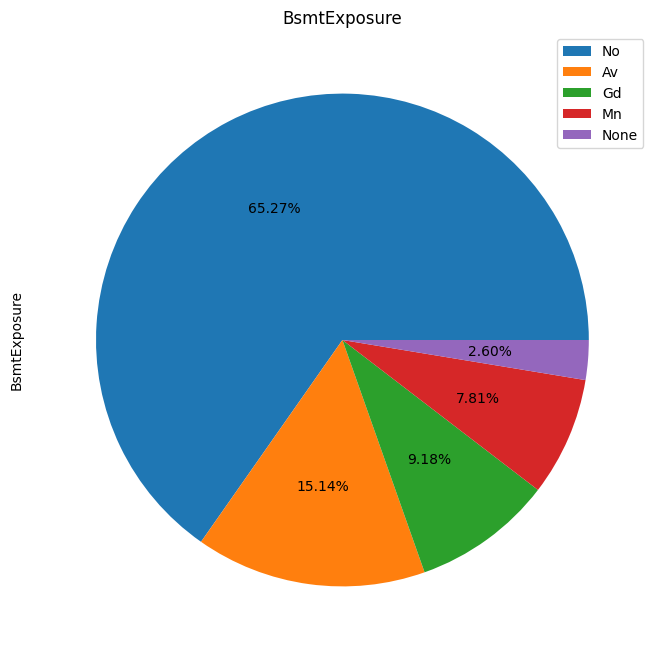

Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64


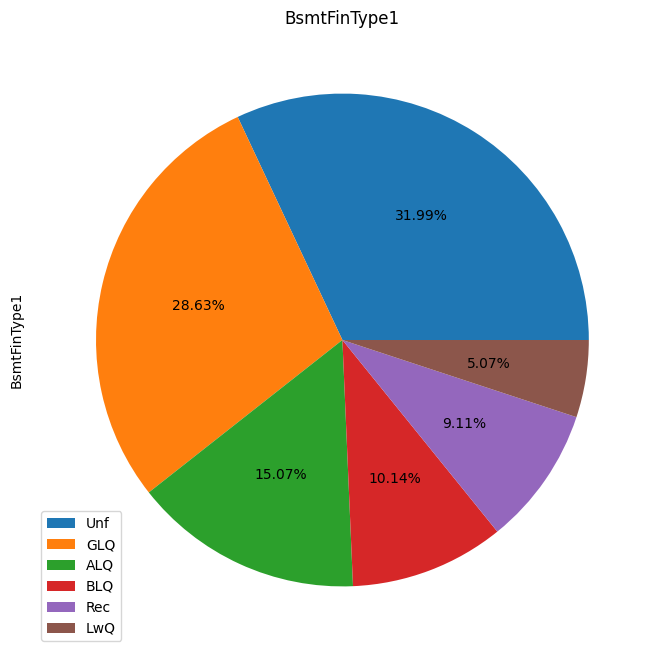

Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: BsmtFinType2, dtype: float64


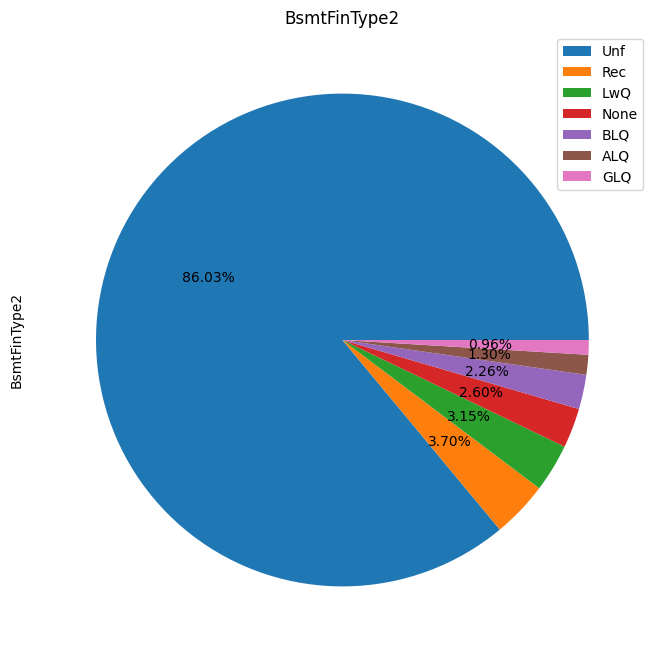

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64


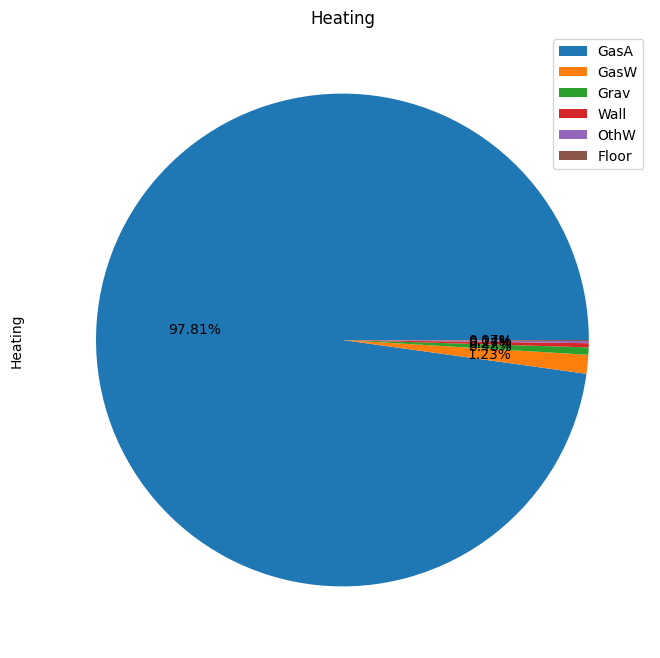

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64


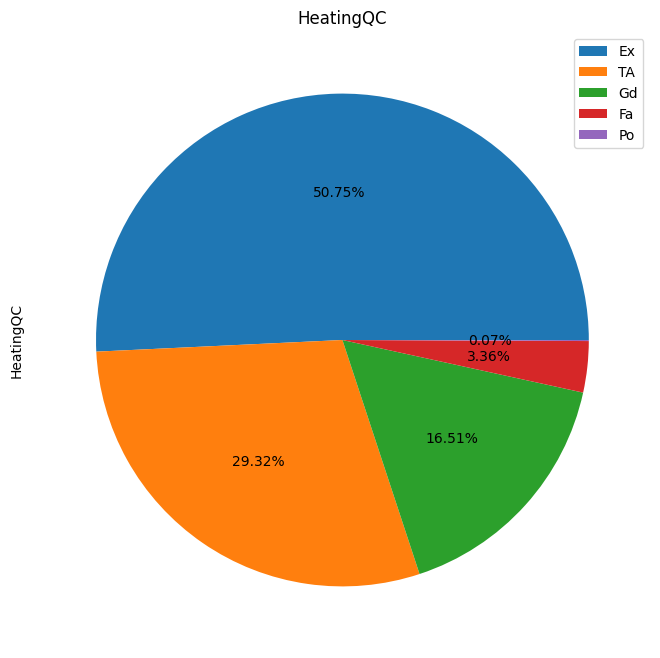

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64


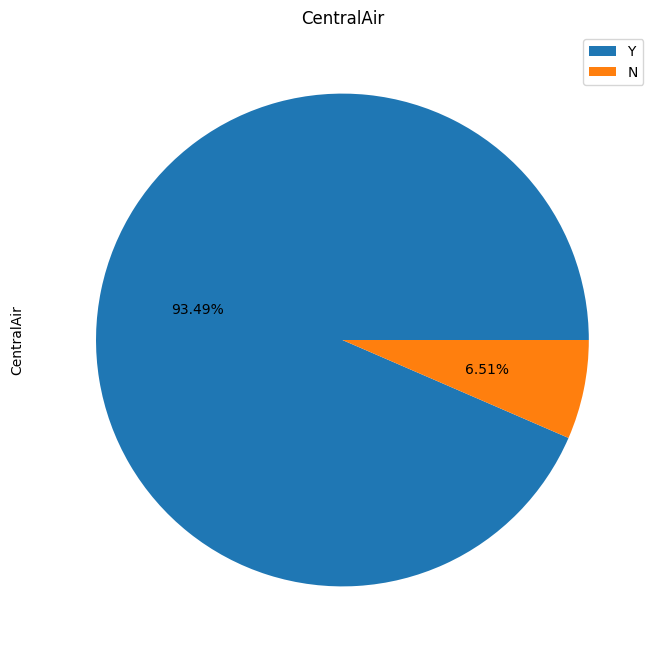

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64


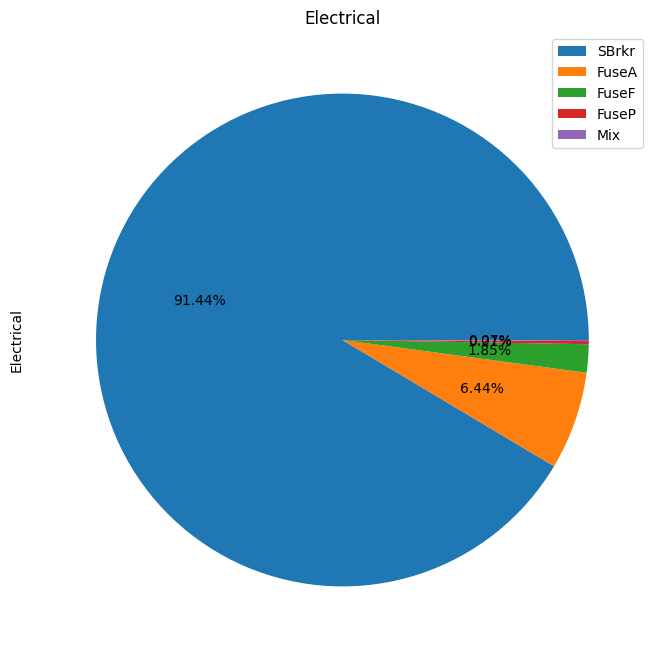

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


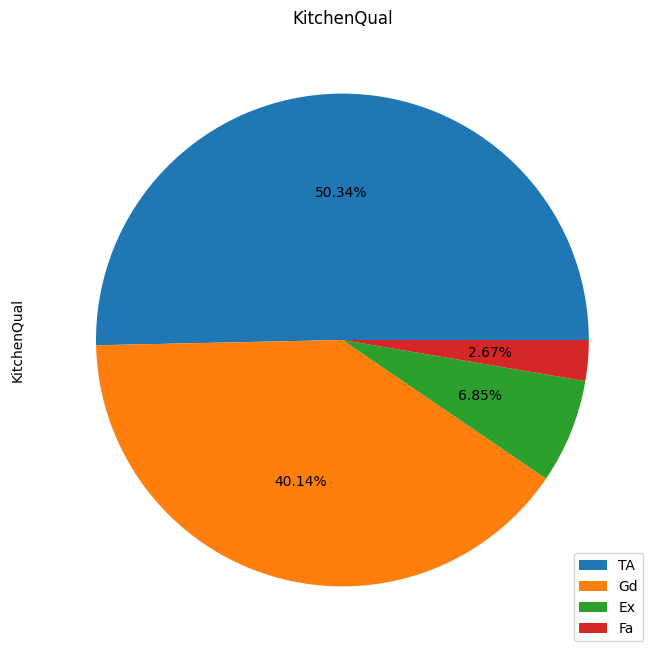

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64


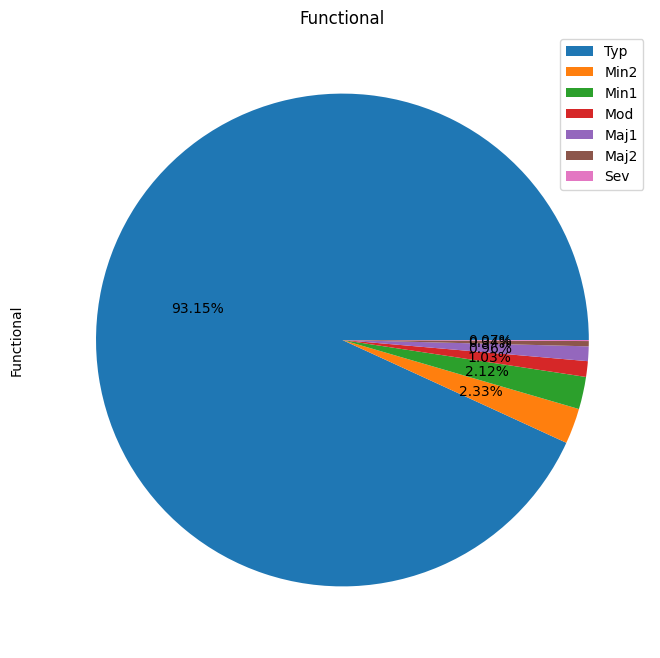

None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: FireplaceQu, dtype: float64


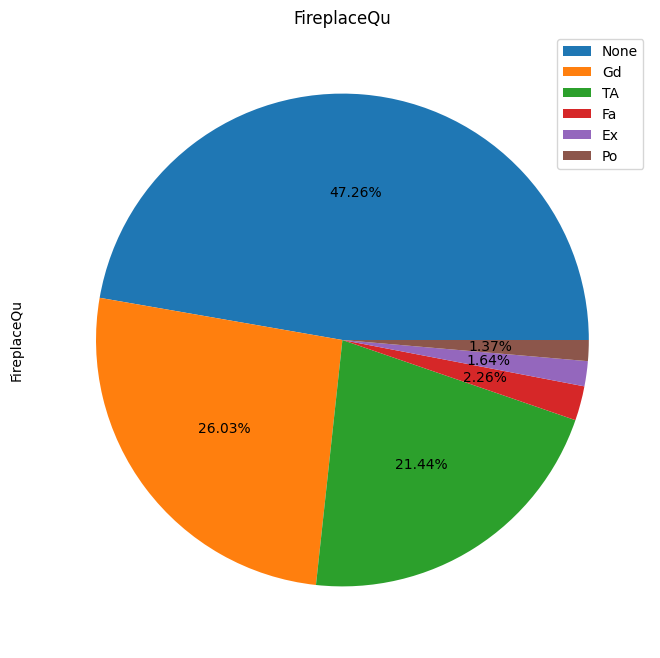

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


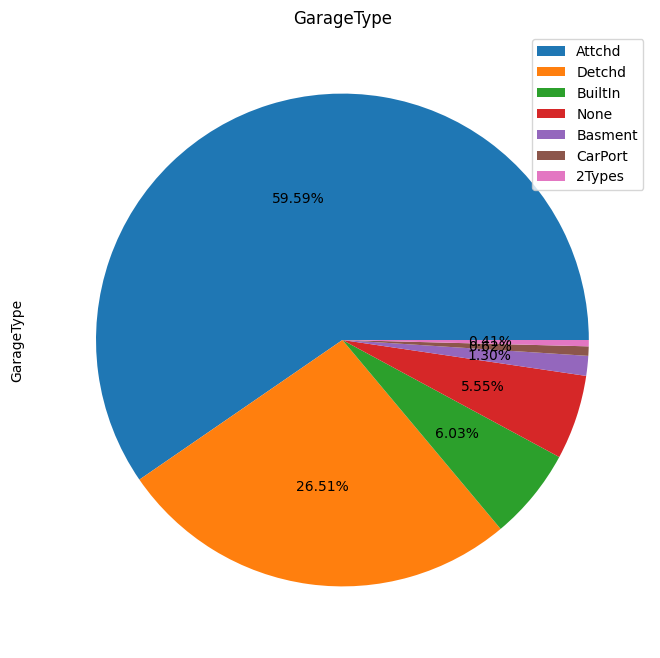

Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: GarageFinish, dtype: float64


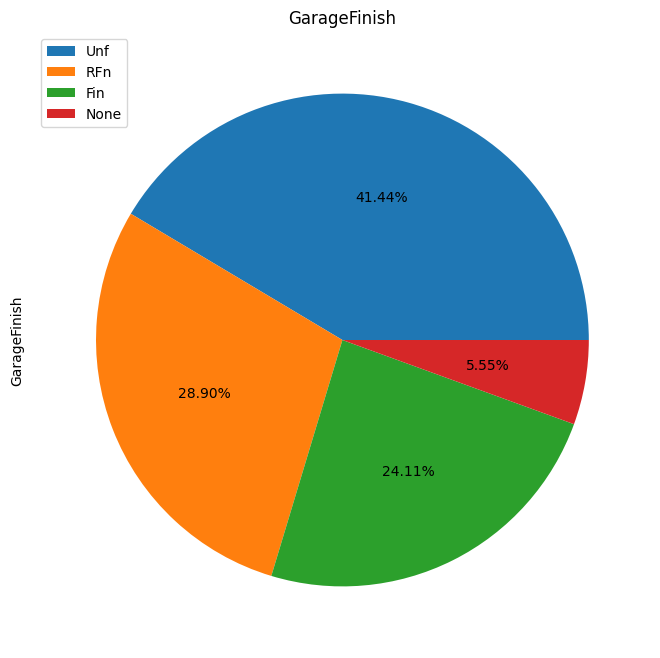

TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: GarageQual, dtype: float64


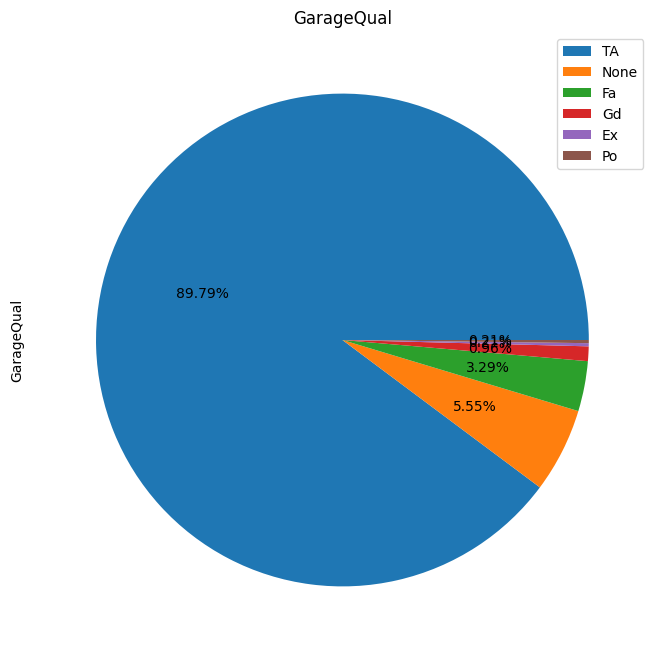

TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: GarageCond, dtype: float64


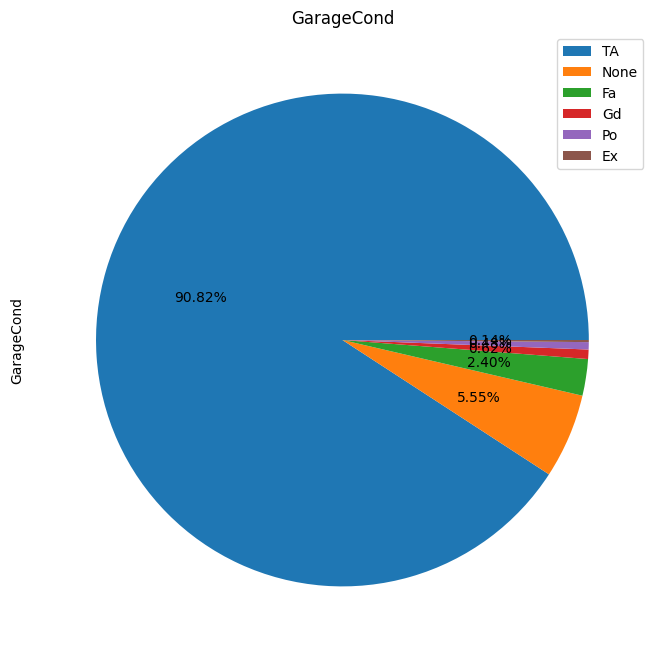

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64


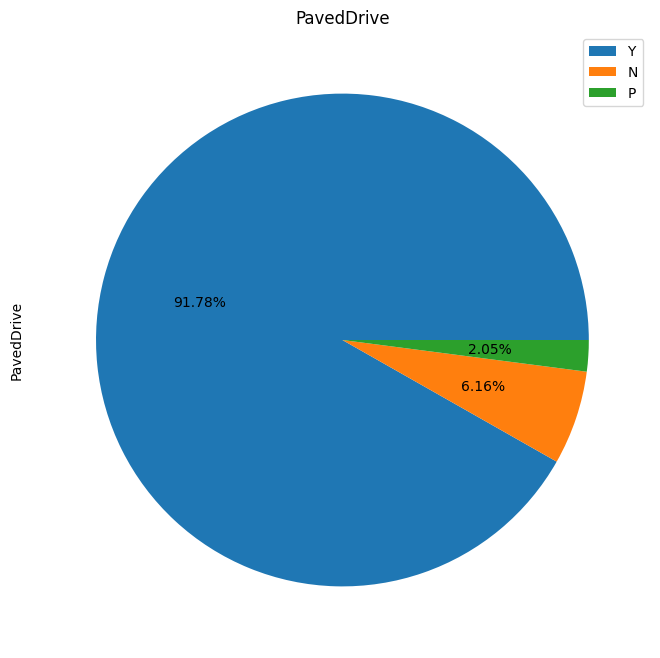

None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: PoolQC, dtype: float64


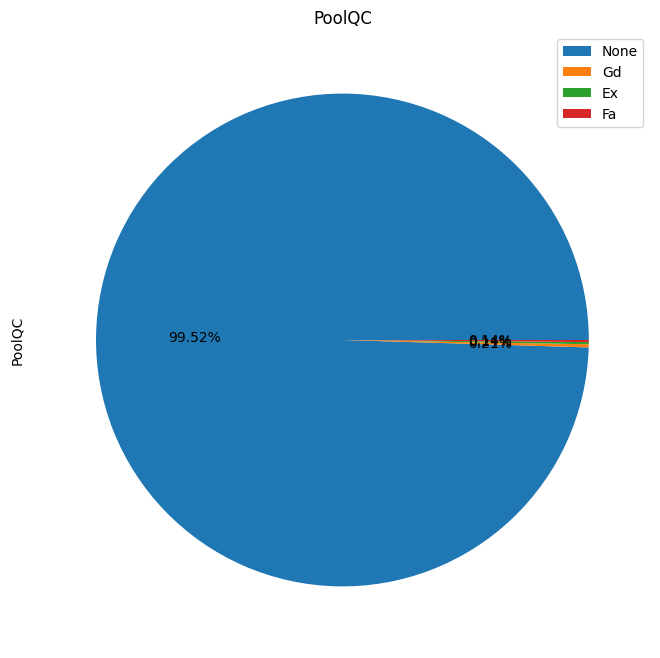

None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64


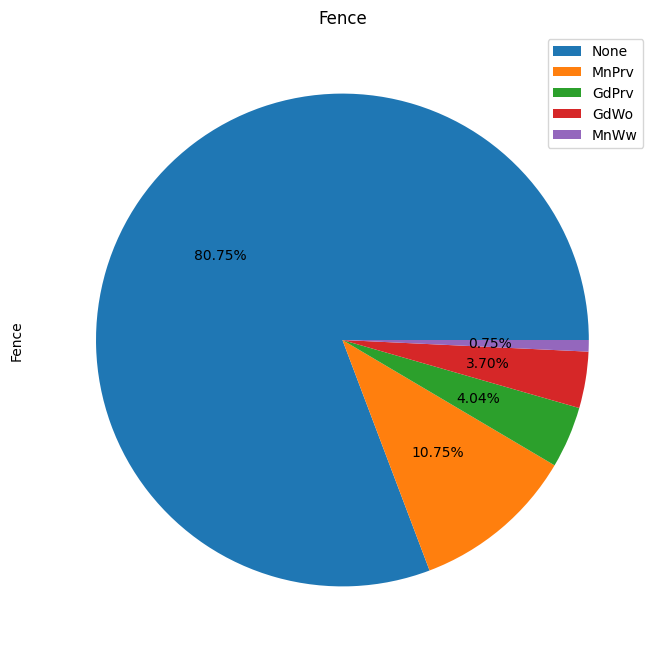

None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64


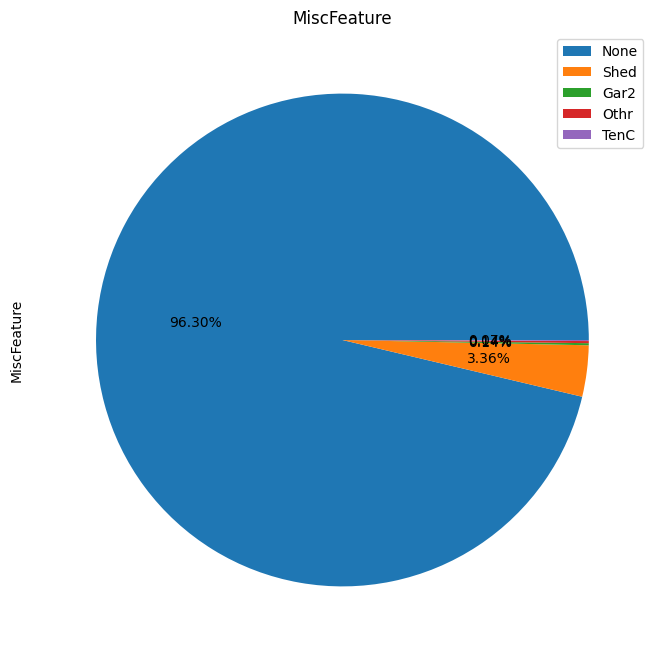

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64


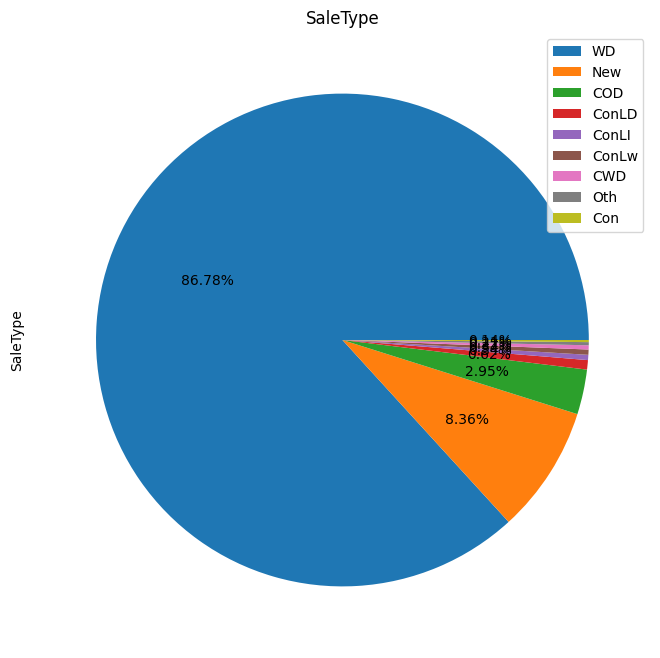

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64


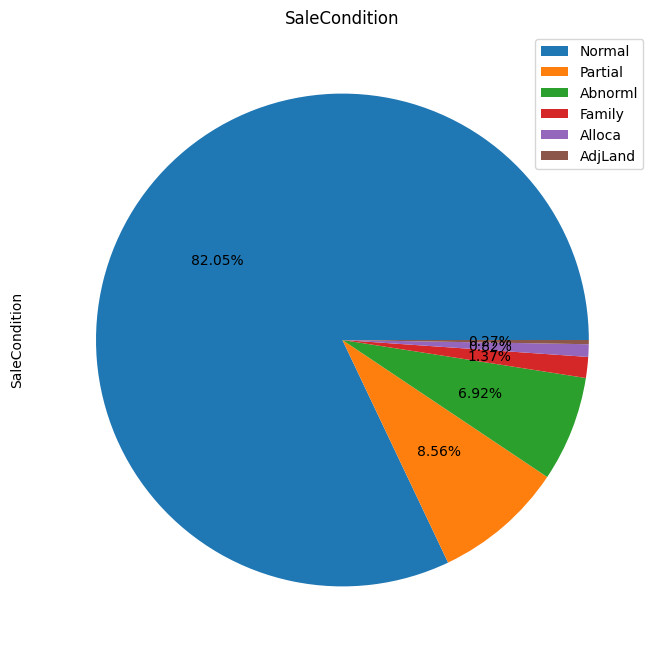

In [37]:
import matplotlib.pyplot as plt

for col in cat_cols:
    print(housing[col].value_counts(normalize=True))
    plt.figure(figsize=(8, 8))
    housing[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct="%1.2f%%")
    plt.title(col)  # Optional: Add title for each pie chart
    plt.legend()  
    plt.show()


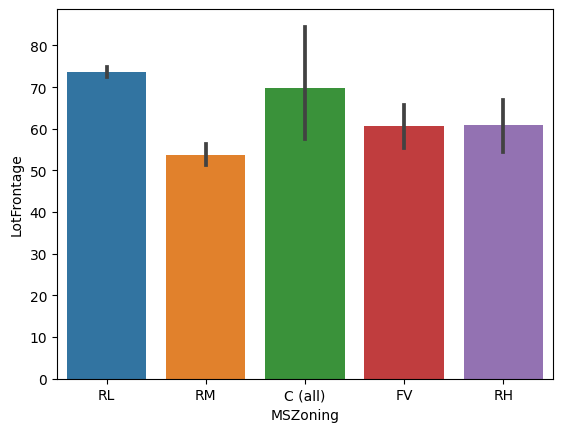

In [38]:
sns.barplot(x= "MSZoning",y = "LotFrontage",data=housing)
plt.show()

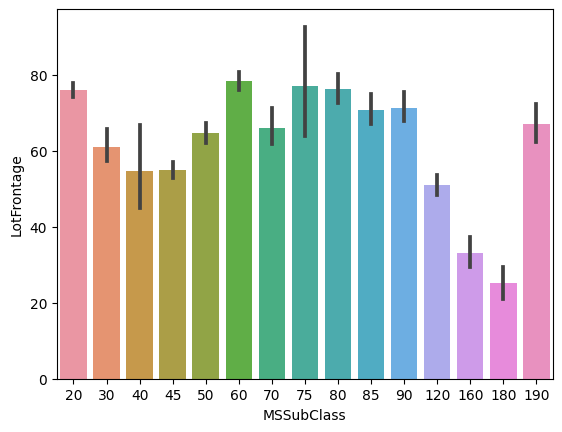

In [39]:
sns.barplot(x= "MSSubClass",y = "LotFrontage",data=housing)
plt.show()

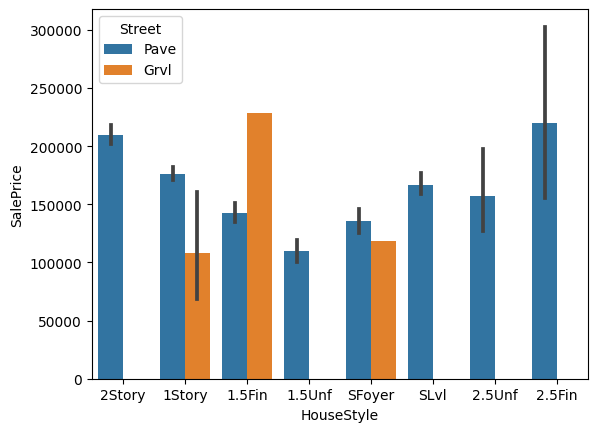

In [40]:
sns.barplot(x= "HouseStyle", y= "SalePrice",hue="Street",data=housing)
plt.show()

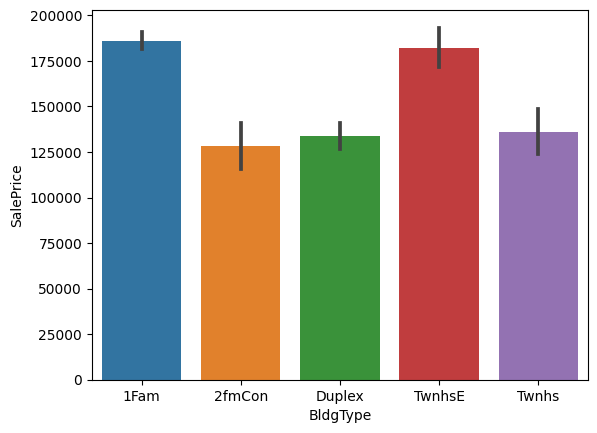

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use correct column names in the barplot
sns.barplot(x="BldgType", y="SalePrice", data=housing)
plt.show()


In [42]:
housing["Age"] = housing["YrSold"] = housing["YearBuilt"]
housing.drop(columns=["YearBuilt","YrSold"],axis = 1,inplace= True)

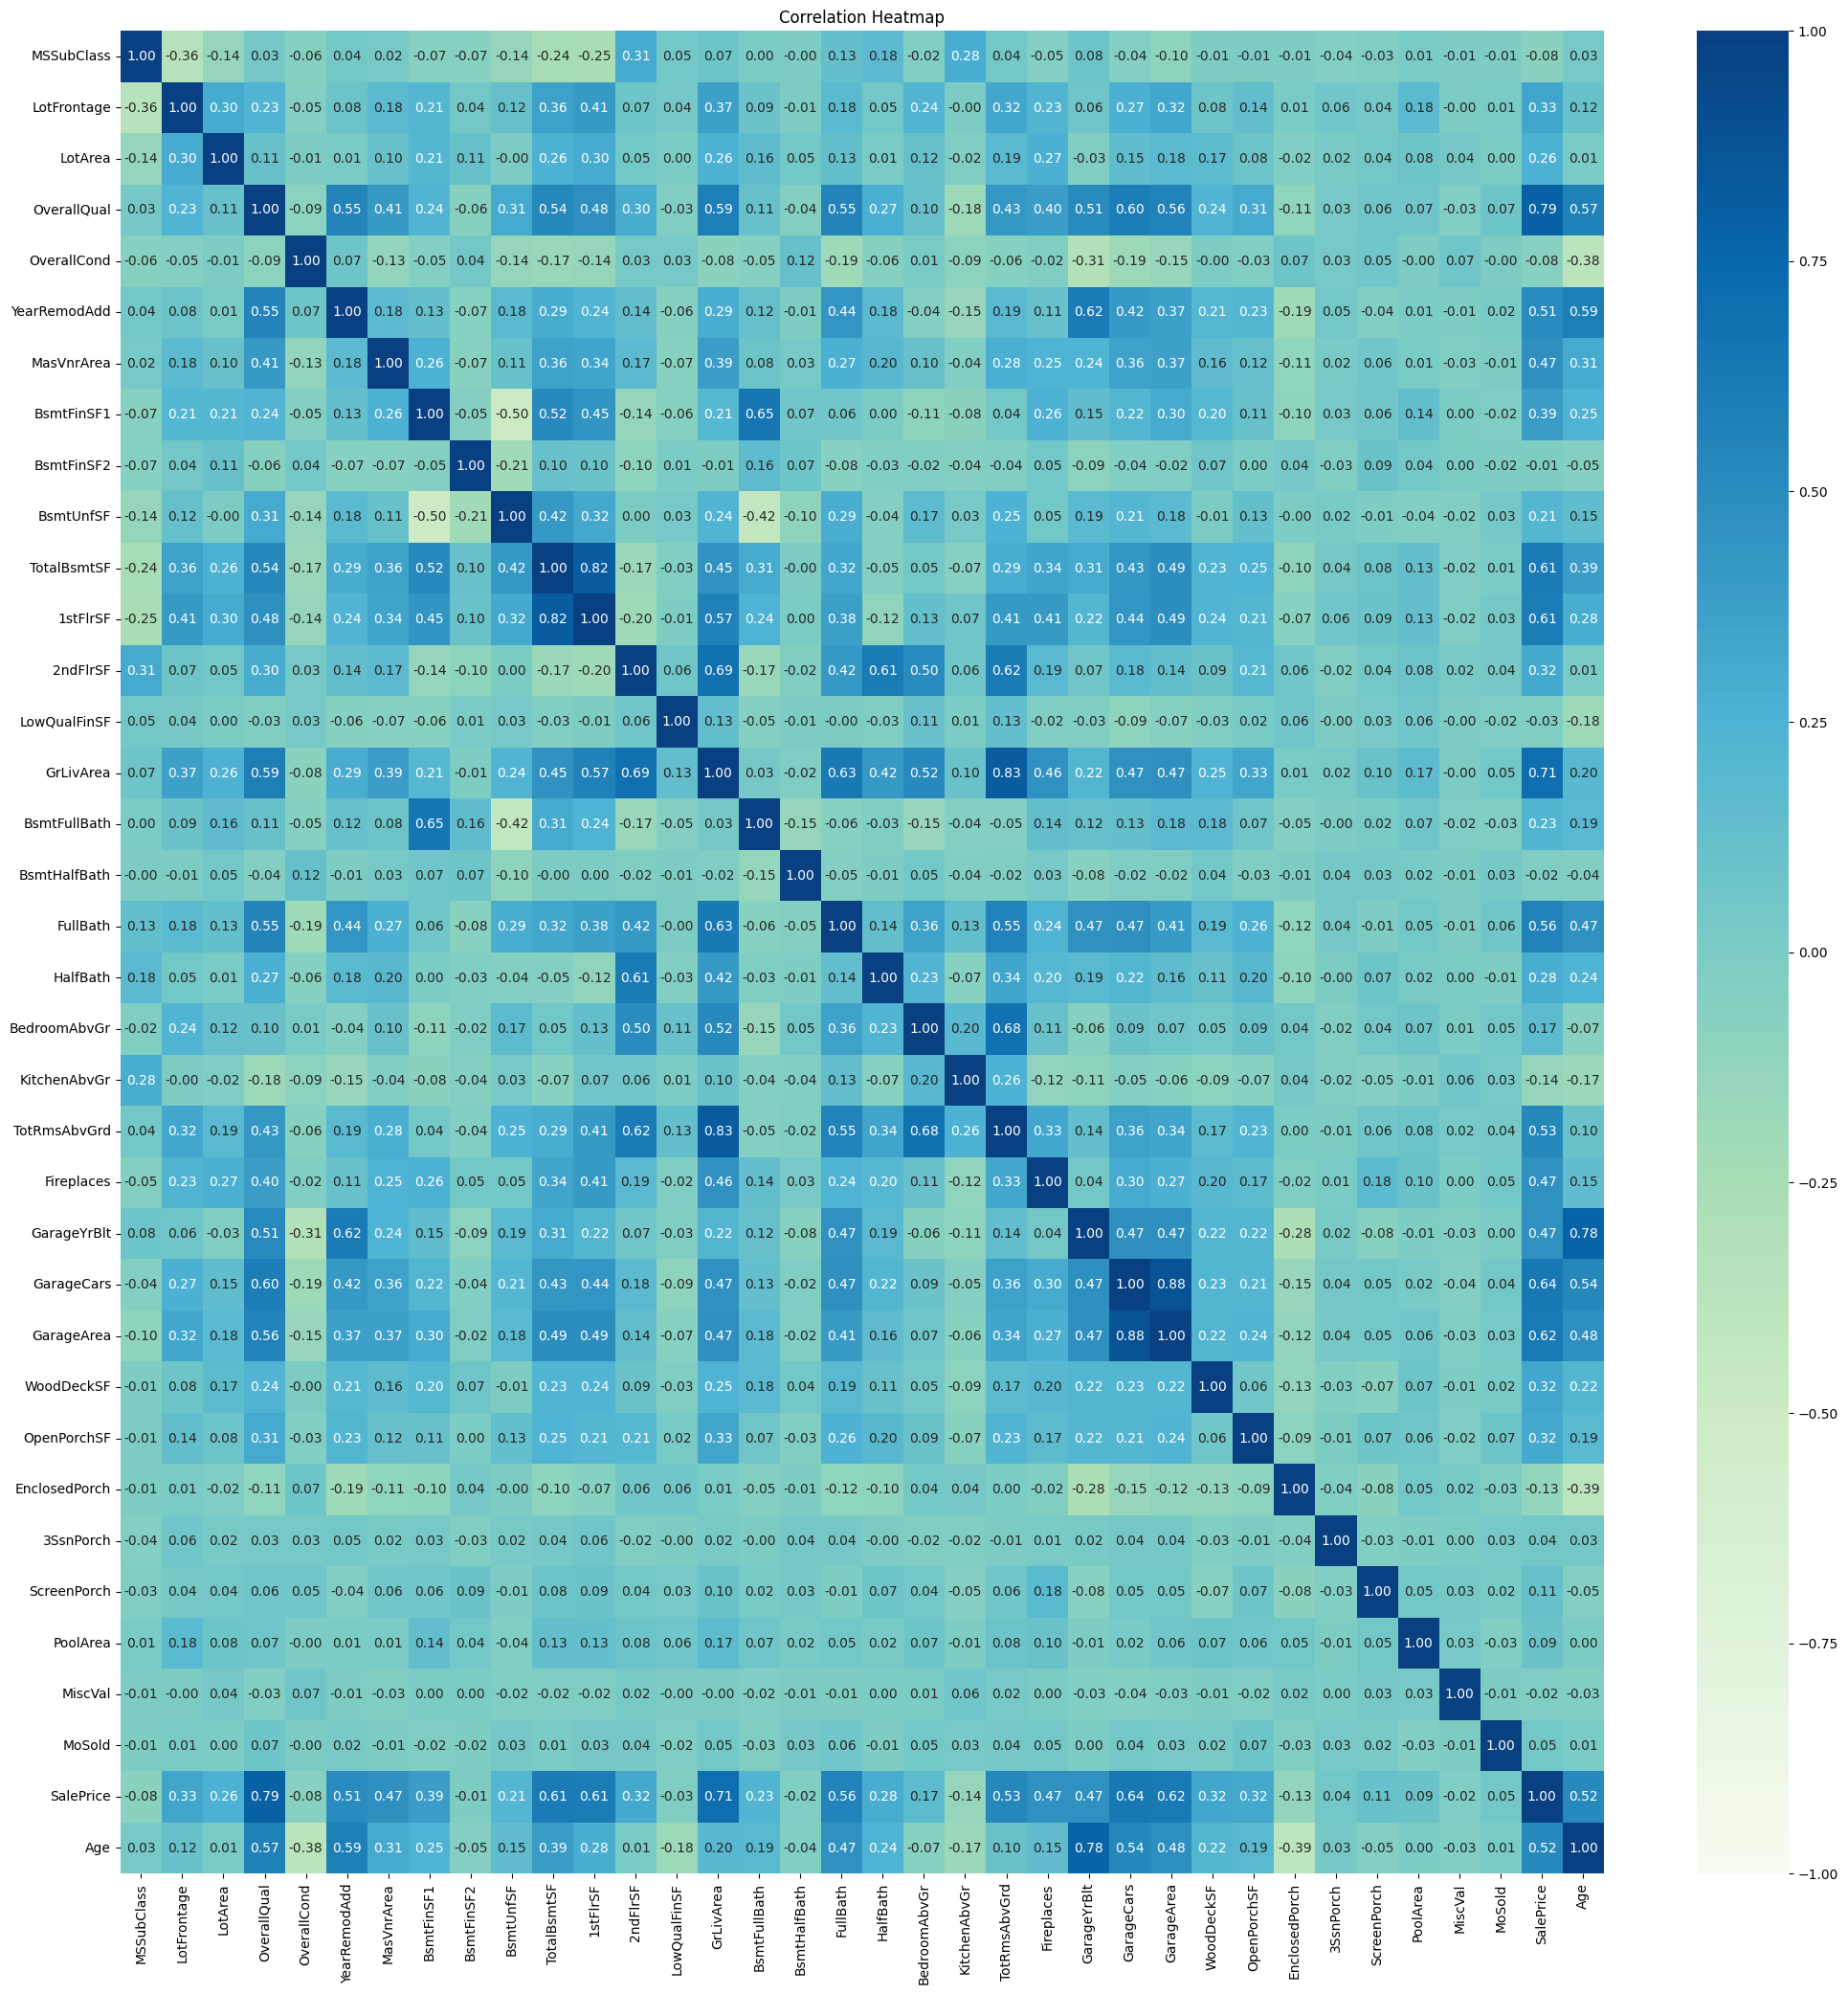

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = housing.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


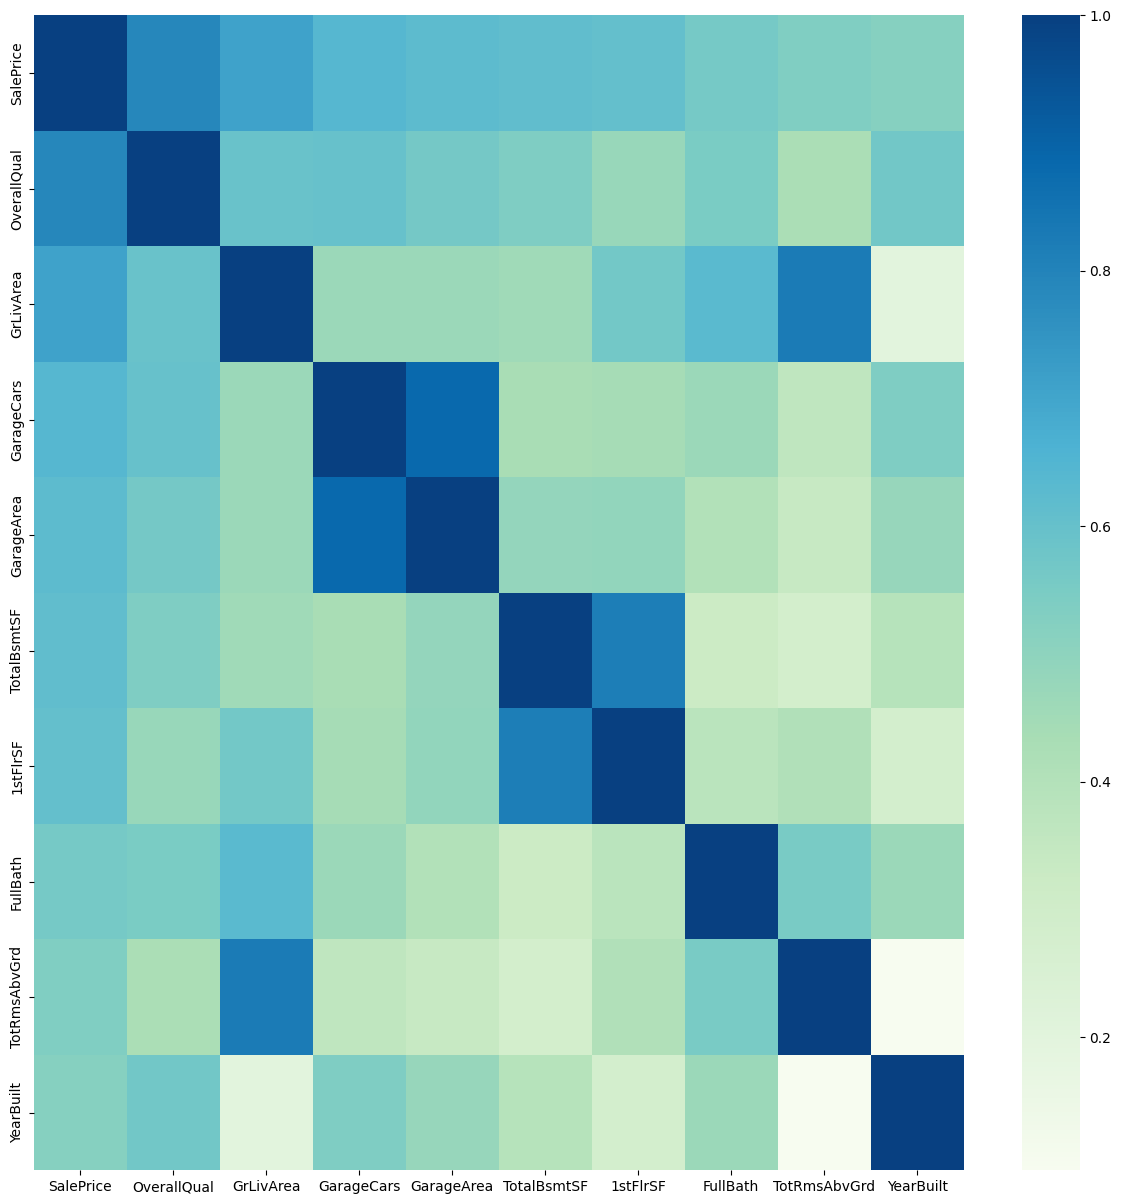

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numeric columns
corr_matrix = housing.corr()

# Get the top 10 features most correlated with 'SalePrice'
top_features = corr_matrix['SalePrice'].nlargest(10).index

# Compute the correlation matrix of the top features
cm = np.corrcoef(housing[top_features].T)

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=False, cmap="GnBu", yticklabels=top_features, xticklabels=top_features)
plt.show()


<Figure size 2000x2000 with 0 Axes>

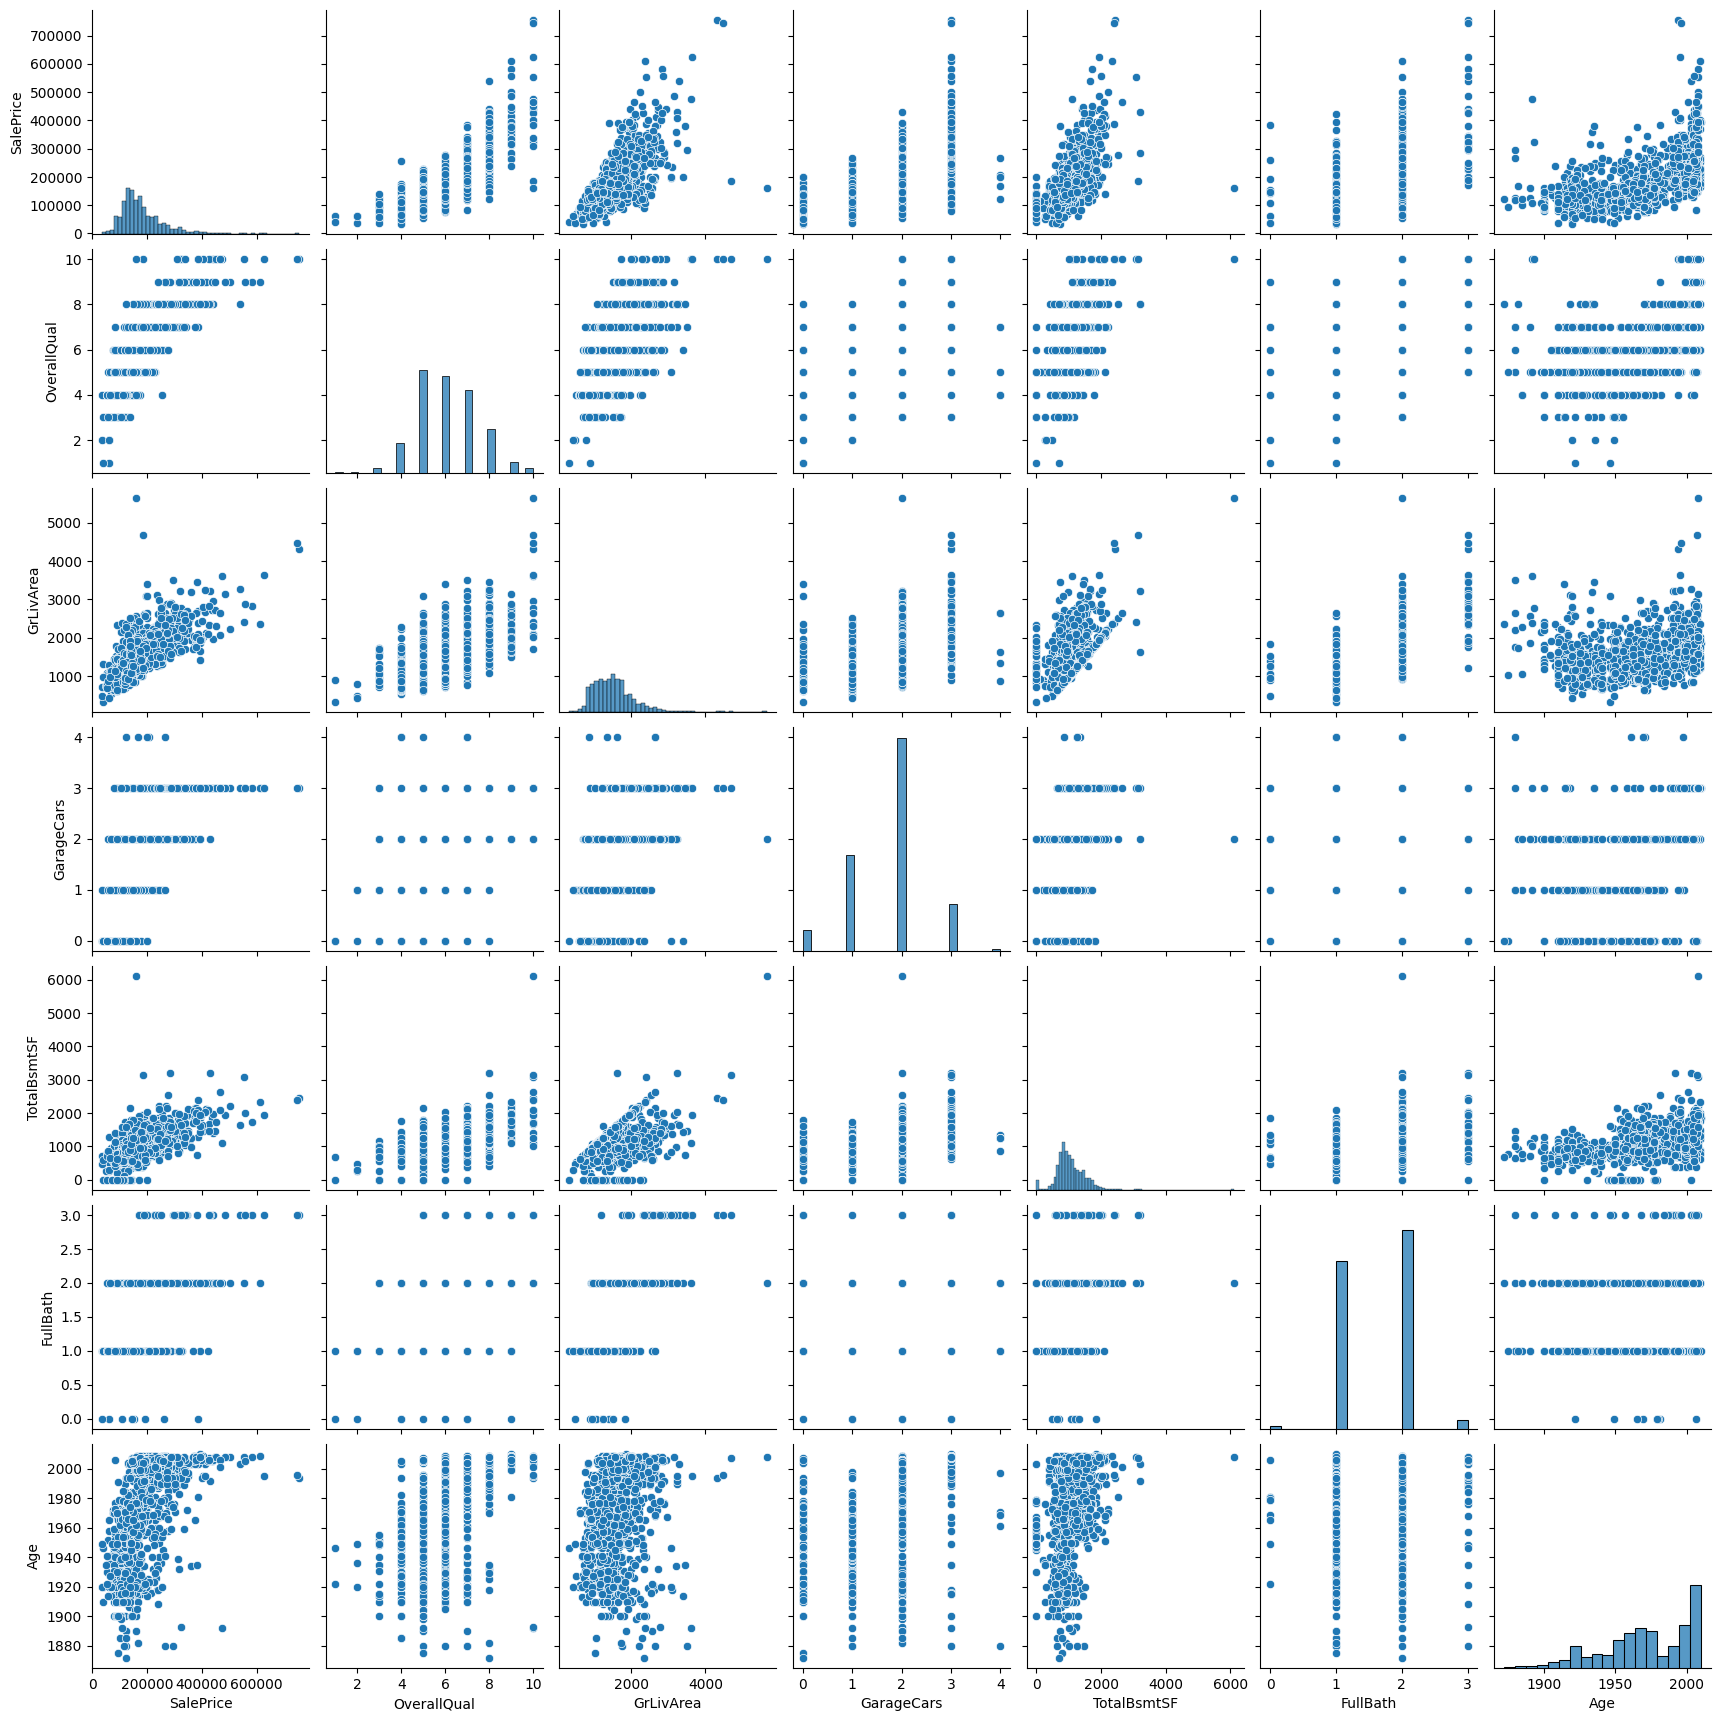

In [44]:
cols =["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","Age"]
plt.figure(figsize=[20,20])
sns.pairplot(housing[cols])
plt.show()

In [45]:
housing_num = housing.select_dtypes(include=["int64", "float64"])
housing_cat = housing.select_dtypes(include='object')


In [46]:
import pandas as pd
housing_cat.shape # or however you initialize it


(1460, 43)

In [47]:
housing_cat_dm = pd.get_dummies(housing_cat, drop_first=True, dtype=int)


In [48]:
housing_cat_dm.shape

(1460, 222)

In [49]:
housing_cat_dm.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0

In [50]:
house = pd.concat([housing_cat_dm,housing_num],axis = 1)

In [52]:
house.shape


(1460, 255)

In [53]:
X = house.drop(["SalePrice"],axis=1).copy()
y = house["SalePrice"].copy()

In [54]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [58]:
num_cols = list(X_train.select_dtypes(include=['int64','float64']).columns)

In [63]:
scaler = StandardScaler()


In [64]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])



In [3]:
from sklearn.metrics import r2_score,mean_squared_error
def eval_metrics(y_train,y_train_pred,y_test,y_pred):
    print("r2 score (train) = ",'%.2f' % r2_score(y_train,y_train_pred))
    print("r2 score (train) = ",'%.2f' % r2_score(y_test,y_pred))
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_train = mean_squared_error(y_test,y_pred)
    rmse_train = mse_train ** 0.5
    rmse_test = mse_train ** 0.5
    print("RMSE(Train) = ",".2f" %rmse_train)
    print("RMSE(Test) = ",".2f" %rmse_test)

In [74]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [75]:


from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(
    alphas=[0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
    scoring='neg_mean_absolute_error',
    cv=5
)
ridgecv.fit(X_train, y_train)

print("Best alpha:", ridgecv.alpha_)



Best alpha: 10.0


In [77]:
ridgecv.alpha_


10.0

In [78]:
ridge=Ridge(alpha=9)
ridge.fit(X_train,y_train)

Ridge(alpha=9)

In [80]:
y_train_pred=ridge.predict(X_train)
y_pred=ridge.predict(X_test)

In [81]:
eval_metrics(y_train,y_train_pred,y_test,y_pred)

r2 score (train) =  0.89
r2 score (train) =  0.87
RMSE(Train) =  .2f
RMSE(Test) =  .2f


In [83]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge and parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV
ridgecv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridgecv.fit(X_train, y_train)

# Best alpha
print("Best alpha:", ridgecv.best_params_)

# Full CV results
ridgecv_res = pd.DataFrame(ridgecv.cv_results_)
print(ridgecv_res.head())


Best alpha: {'alpha': 0.01}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.031513      0.005042         0.007919        0.002398        0.01   
1       0.028025      0.004629         0.006973        0.001263         0.1   
2       0.029084      0.002742         0.005608        0.000797           1   
3       0.036385      0.001946         0.006109        0.001447          10   
4       0.035434      0.004433         0.006244        0.001020         100   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}           0.861004           0.413420           0.768835   
1   {'alpha': 0.1}           0.853475           0.198138           0.786193   
2     {'alpha': 1}           0.817604           0.132681           0.820389   
3    {'alpha': 10}           0.807215           0.098534           0.836671   
4   {'alpha': 100}           0.782916           0.147798           0.814864   

   split3_test_score  

In [84]:
def eval_metrics(y_train,y_train_pred,y_test,y_pred):
    print("r2 score (train) = ",'%.2f' % r2_score(y_train,y_train_pred))
    print("r2 score (train) = ",'%.2f' % r2_score(y_test,y_pred))
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_train = mean_squared_error(y_test,y_pred)
    rmse_train = mse_train ** 0.5
    rmse_test = mse_train ** 0.5
    print("RMSE(Train) = ",".2f" %rmse_train)
    print("RMSE(Test) = ",".2f" %rmse_test)

Best alpha: 0.004094915062380427


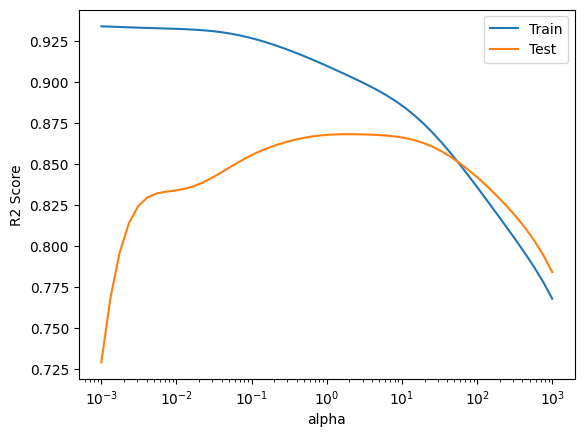

In [86]:
from sklearn.linear_model import RidgeCV
import numpy as np
import matplotlib.pyplot as plt

# Sample alphas to try
alphas = np.logspace(-3, 3, 50)

# Train RidgeCV with score storage
ridgecv = RidgeCV(alphas=alphas, store_cv_values=True, scoring='r2')
ridgecv.fit(X_train, y_train)

# Get the chosen alpha
print("Best alpha:", ridgecv.alpha_)

# RidgeCV stores the mean squared error per alpha for each sample
# For R^2 scores, we need to refit manually for each alpha
train_scores = []
test_scores = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Plot
plt.plot(alphas, train_scores, label='Train')
plt.plot(alphas, test_scores, label='Test')
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()


Fitting 5 folds for each of 11 candidates, totalling 55 fits

Best Ridge Alpha: {'alpha': 0.01}
Best Ridge Score (Neg MAE): -45.427478474718086


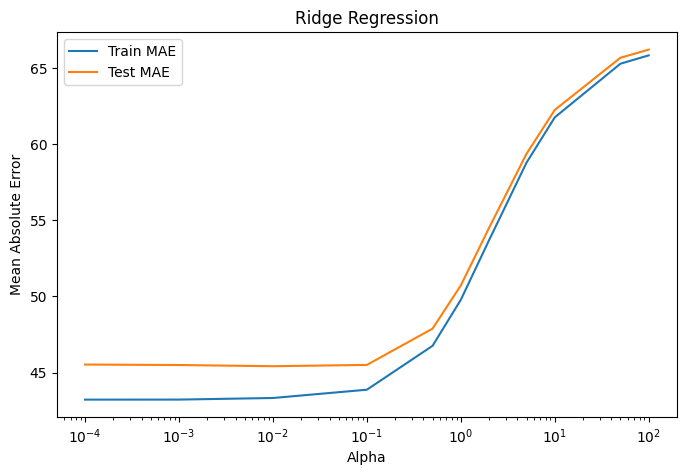

Fitting 5 folds for each of 11 candidates, totalling 55 fits

Best Lasso Alpha: {'alpha': 0.01}
Best Lasso Score (Neg MAE): -45.47609416090288


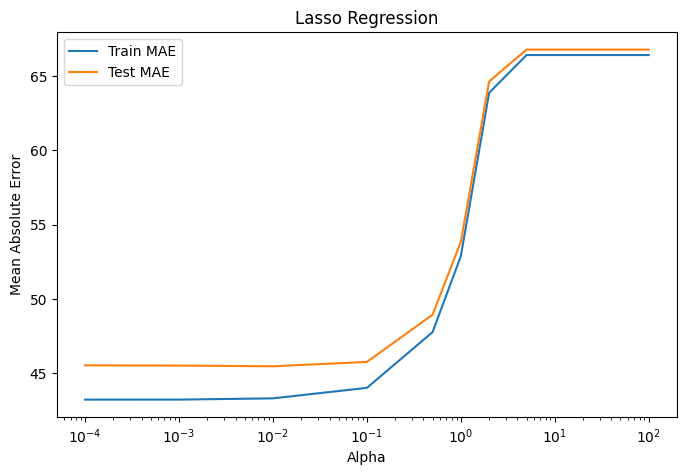

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

# -----------------
# Example data (replace with your dataset)
# -----------------
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------
# Common parameter grid (smaller to reduce load)
# -----------------
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10, 50, 100]
}

# -----------------
# Ridge Regression
# -----------------
ridge = Ridge()
ridgecv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1,
                       n_jobs=1)  # Use 1 core to prevent crash

ridgecv.fit(X_train, y_train)

print("\nBest Ridge Alpha:", ridgecv.best_params_)
print("Best Ridge Score (Neg MAE):", ridgecv.best_score_)

ridgecv_res = pd.DataFrame(ridgecv.cv_results_)
plt.figure(figsize=(8,5))
plt.plot(ridgecv_res['param_alpha'], -ridgecv_res['mean_train_score'], label='Train MAE')
plt.plot(ridgecv_res['param_alpha'], -ridgecv_res['mean_test_score'], label='Test MAE')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Ridge Regression')
plt.xscale('log')
plt.legend()
plt.show()

# -----------------
# Lasso Regression
# -----------------
lasso = Lasso(max_iter=10000)
lassocv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1,
                       n_jobs=1)  # Use 1 core to prevent crash

lassocv.fit(X_train, y_train)

print("\nBest Lasso Alpha:", lassocv.best_params_)
print("Best Lasso Score (Neg MAE):", lassocv.best_score_)

lassocv_res = pd.DataFrame(lassocv.cv_results_)
plt.figure(figsize=(8,5))
plt.plot(lassocv_res['param_alpha'], -lassocv_res['mean_train_score'], label='Train MAE')
plt.plot(lassocv_res['param_alpha'], -lassocv_res['mean_test_score'], label='Test MAE')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso Regression')
plt.xscale('log')
plt.legend()
plt.show()


In [98]:
lassocv.best_params_

{'alpha': 0.01}

In [100]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [102]:
y_train_pred1=lasso.predict(X_train)
y_pred1=lasso.predict(X_test)

In [103]:
eval_metrics(y_train,y_train_pred1,y_test,y_pred1)

r2 score (train) =  0.53
r2 score (train) =  0.45
RMSE(Train) =  .2f
RMSE(Test) =  .2f


In [104]:
lassocv_res=pd.DataFrame(lassocv.cv_results_)
lassocv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012070,0.009668,0.002843,0.000991,0.0001,{'alpha': 0.0001},-41.100042,-49.255535,-43.221361,-45.524250,-48.605655,-45.541368,3.107829,3,-44.143823,-42.582003,-43.704920,-43.141350,-42.608595,-43.236138,0.612264
1,0.006398,0.001195,0.002803,0.000753,0.001,{'alpha': 0.001},-41.125021,-49.140985,-43.267707,-45.560347,-48.529321,-45.524676,3.051483,2,-44.147358,-42.589551,-43.705534,-43.142912,-42.601981,-43.237467,0.613118
2,0.003800,0.000749,0.002204,0.000398,0.01,{'alpha': 0.01},-41.497198,-48.649907,-43.554235,-45.826306,-47.852826,-45.476094,2.659690,1,-44.242401,-42.696476,-43.784711,-43.192503,-42.687816,-43.320781,0.611796
3,0.004202,0.001166,0.002201,0.000977,0.1,{'alpha': 0.1},-42.245492,-48.347213,-43.587324,-47.470574,-47.199893,-45.770099,2.398533,4,-44.789989,-43.774853,-44.508419,-43.723343,-43.337887,-44.026898,0.537509
4,0.004399,0.001614,0.002403,0.001205,0.5,{'alpha': 0.5},-46.117287,-49.496349,-44.972076,-55.498216,-48.615580,-48.939902,3.664344,5,-48.249975,-47.478897,-48.031915,-47.614006,-47.489603,-47.772879,0.311971


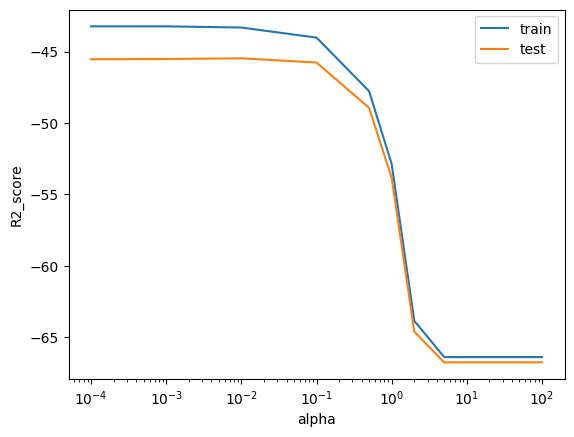

In [105]:
plt.plot(lassocv_res['param_alpha'],lassocv_res['mean_train_score'],label='train')
plt.plot(lassocv_res['param_alpha'],lassocv_res['mean_test_score'],label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()
